# ECON 148 Final Project Template
### Summer 2023



### Topic: 
The Association Between Income and Life Expectancy in the United States

### Group Members: 
_Group member names here in alphabetical order_: Carol Xu(25%),Helen Huang(25%),Ying Ding(40%),Ian Dutta(10%)

Ying Ding(40%): PCA, ML Model

Carol Xu(25%): EDA, slides of presentation

Helen Huang(25%): Project background and objective, Interpretation and Conclusions

Ian Dutta(10%): presentation

## Source Data - Opportunity Insights

In order to make the project consistent across teams, we are limiting the project to a specific set of datasets that are linked to economics journal articles.  


In [1]:
import pandas as pd #for building dataframes from CSV files
import seaborn as sns #for fancy charts
import numpy as np #for np.nan
from scipy import stats #for statistical analysis
from scipy.stats import norm #for statistical analysis
from datetime import datetime #for time-series plots
import statsmodels #for integration with pandas and analysis
import statsmodels.api as sm # for regression modules
from statsmodels.formula.api import ols # for regression modules
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# load in clean and tidy data and create workfile
df = pd.read_csv("health_ineq_online_table_2.csv")

## Project Background & Objective (5 points)
## Project Background
The journal article uses new data from 1.4 billion anonymous earnings and mortality records to construct more precise estimates of the relationship between income and life expectancy at the national level than was feasible in prior work. The authors then construct new local area (county and metro area) estimates of life expectancy by income group and identify factors that are associated with higher levels of life
expectancy for low-income individuals. Our study yields four sets of results.

1. Large Gaps at the National Level: 
The richest American men live 15 years longer than the poorest men, while the richest American women live 10 years longer than the poorest women.
2. Growing Gaps over Time at the National Level: 
Inequality in life expectancy has increased in recent years at the national level. Between 2001 and 2014, individuals in the top 5% of income distribution gained around 3 years of life expectancy. In contrast, the lifespans of Americans in the bottom 5% of the income distribution
did not increase between to 2001 and 2014.
3. Life Expectancies for the Poor Vary Significantly Across Areas: 
Life expectancy for low income people varies by about 5 years from the best to worst cities.
4. The Poor Live Longest in Affluent, Educated Cities with Healthy Behaviors: 
Low-income individuals tend to live the longest (and have the most healthful behaviors) in affluent cities with highly educated populations and high levels of government expenditures, such as New York and San Francisco. Cities with such characteristics also experienced the
largest gains in life expectancy among the poor during the 2000s.


## Objective
The purpose of this project is to develop a predictive model that estimates life expectancy based on income and other relevant factors, aiming to inform public health policies and interventions to reduce health disparities. The relationship between income and life expectancy has been a topic of interest for economists, sociologists, and public health experts for many years. The seminal study "The Association Between Income and Life Expectancy in the United States, 2001–2014" by Raj Chetty and colleagues provided critical insights into this relationship, revealing significant variations across different geographic areas and income levels. However, the causal mechanisms behind these associations remain less clear, and the study's findings have significant implications for social insurance programs and public health policies.

The need for a quantitative analysis in this context arises from the complexity of the factors influencing life expectancy. Income is just one of many variables that can impact a person's health and longevity, alongside others like education, access to healthcare, lifestyle behaviors, and environmental factors. Quantitative analysis allows us to isolate the effects of income from these other variables, providing a clearer picture of its role in determining life expectancy.

The potential impact of this analysis is substantial. By better understanding the relationship between income and life expectancy, we can inform policies aimed at reducing health disparities and improving population health. For instance, if we find that income has a significant effect on life expectancy, this could support policies aimed at reducing income inequality as a means of improving public health.

The central objective of this project is to replicate and extend the analysis conducted by Chetty et al., using their data to investigate the relationship between income and life expectancy. Specifically, we aim to build a predictive model that can estimate life expectancy based on income and other relevant variables. This could take the form of a regression model, where life expectancy is the dependent variable and income is one of several independent variables.

This project is important because it aims to use quantitative analysis to shed light on the complex relationship between income and life expectancy. The findings of this project could have significant implications for public health policy and social inequality, making it a valuable contribution to ongoing debates in these fields.


## Data Description (5 points)

In [3]:
df.head()

gnd  pctile  year   count     hh_inc     le_agg  le_raceadj  sd_le_agg  \
0   F       1  2001  398740  499.10938  79.682068   79.893463   0.392838   
1   F       1  2002  411159  541.30695  79.183594   79.410622   0.353981   
2   F       1  2003  420298  529.13910  79.364410   79.572174   0.364780   
3   F       1  2004  427728  499.29950  79.898407   80.092476   0.352018   
4   F       1  2005  433665  474.14536  80.283600   80.465935   0.334612   

   sd_le_raceadj  
0       0.385240  
1       0.346817  
2       0.359097  
3       0.347992  
4       0.330986

In [4]:
#Summary Statistics
df.describe()

pctile         year          count        hh_inc       le_agg  \
count  2800.000000  2800.000000    2800.000000  2.800000e+03  2800.000000   
mean     50.500000  2007.500000  433773.845714  9.764774e+04    83.627406   
std      28.871226     4.031849   18872.974468  1.977964e+05     3.657129   
min       1.000000  2001.000000  387717.000000  1.375935e+02    67.862122   
25%      25.750000  2004.000000  421633.000000  3.083662e+04    81.774229   
50%      50.500000  2007.500000  436506.000000  6.119835e+04    84.143944   
75%      75.250000  2011.000000  445446.500000  1.048515e+05    86.313641   
max     100.000000  2014.000000  462127.000000  2.435930e+06    91.120705   

        le_raceadj    sd_le_agg  sd_le_raceadj  
count  2800.000000  2800.000000    2800.000000  
mean     83.672665     0.560205       0.550729  
std       3.600353     0.107541       0.106312  
min      68.343384     0.179007       0.185262  
25%      81.858478     0.494333       0.485487  
50%      84.189408     0.560017       0.550386  
75%      86.306168     0.624831       0.614215  
max      91.076477     0.998827       0.974649

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gnd            2800 non-null   object 
 1   pctile         2800 non-null   int64  
 2   year           2800 non-null   int64  
 3   count          2800 non-null   int64  
 4   hh_inc         2800 non-null   float64
 5   le_agg         2800 non-null   float64
 6   le_raceadj     2800 non-null   float64
 7   sd_le_agg      2800 non-null   float64
 8   sd_le_raceadj  2800 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 197.0+ KB


There are no missing variables, so no need to drop or impute data.

The overview of the raw data indicates that there are a total of 2800 entries and 9 variables in the dataset. 

Before data cleaning, it is mentioned that there are no missing values, which means that all the entries in the dataset have values for each variable, and there is no need to handle missing data by dropping or imputing values. However, it is essential to note that the absence of missing values does not imply that the data is error-free or completely free from other data quality issues. 

We will still be assessing the quality of the data, checking for outliers, and considering other aspects of data cleaning and validation to ensure the reliability and validity of the analysis.

In [6]:
df_females = df[df["gnd"]=="F"]
df_females

gnd  pctile  year   count        hh_inc     le_agg  le_raceadj  \
0      F       1  2001  398740  4.991094e+02  79.682068   79.893463   
1      F       1  2002  411159  5.413070e+02  79.183594   79.410622   
2      F       1  2003  420298  5.291391e+02  79.364410   79.572174   
3      F       1  2004  427728  4.992995e+02  79.898407   80.092476   
4      F       1  2005  433665  4.741454e+02  80.283600   80.465935   
...   ..     ...   ...     ...           ...        ...         ...   
1395   F     100  2010  461834  1.854144e+06  89.889374   89.868301   
1396   F     100  2011  460228  1.531628e+06  90.193260   90.163704   
1397   F     100  2012  460809  1.747049e+06  90.982109   90.939316   
1398   F     100  2013  458182  1.718311e+06  90.511322   90.468498   
1399   F     100  2014  441167  1.114030e+06  91.120705   91.076477   

      sd_le_agg  sd_le_raceadj  
0      0.392838       0.385240  
1      0.353981       0.346817  
2      0.364780       0.359097  
3      0.352018       0.347992  
4      0.334612       0.330986  
...         ...            ...  
1395   0.598780       0.597952  
1396   0.600939       0.601369  
1397   0.468376       0.470671  
1398   0.516318       0.518688  
1399   0.455678       0.459873  

[1400 rows x 9 columns]

In [7]:
print(df_females["le_agg"].describe())

count    1400.000000
mean       85.553131
std         2.354818
min        74.229156
25%        83.896564
50%        85.597878
75%        87.304035
max        91.120705
Name: le_agg, dtype: float64


In [8]:
print(df_females["hh_inc"].describe())

count    1.400000e+03
mean     9.554860e+04
std      1.962535e+05
min      1.713300e+02
25%      2.962133e+04
50%      5.923056e+04
75%      1.027911e+05
max      2.435930e+06
Name: hh_inc, dtype: float64


In [9]:
df_males = df[df["gnd"]=="M"]
df_males

gnd  pctile  year   count        hh_inc     le_agg  le_raceadj  \
1400   M       1  2001  387717  4.286913e+02  72.877655   73.357430   
1401   M       1  2002  398266  4.426573e+02  71.433739   71.936584   
1402   M       1  2003  406375  4.187205e+02  71.535591   72.029266   
1403   M       1  2004  412934  3.831861e+02  72.482246   72.955154   
1404   M       1  2005  418273  3.634149e+02  72.081223   72.551582   
...   ..     ...   ...     ...           ...        ...         ...   
2795   M     100  2010  444908  1.915397e+06  88.769554   88.866783   
2796   M     100  2011  441576  1.595813e+06  88.601631   88.712631   
2797   M     100  2012  442401  1.828705e+06  88.127174   88.256958   
2798   M     100  2013  439032  1.809494e+06  88.823898   88.934837   
2799   M     100  2014  422080  1.334157e+06  89.698997   89.783134   

      sd_le_agg  sd_le_raceadj  
1400   0.308299       0.306622  
1401   0.275866       0.275720  
1402   0.283628       0.284918  
1403   0.282825       0.281899  
1404   0.281706       0.283001  
...         ...            ...  
2795   0.524046       0.504820  
2796   0.572685       0.552049  
2797   0.632195       0.610853  
2798   0.576337       0.556298  
2799   0.485407       0.468213  

[1400 rows x 9 columns]

In [10]:
print(df_males["le_agg"].describe())

count    1400.000000
mean       81.701681
std         3.713684
min        67.862122
25%        78.812754
50%        82.295639
75%        84.694992
max        89.698997
Name: le_agg, dtype: float64


In [11]:
print(df_males["hh_inc"].describe())

count    1.400000e+03
mean     9.974689e+04
std      1.993753e+05
min      1.375935e+02
25%      3.222376e+04
50%      6.352668e+04
75%      1.068312e+05
max      2.405199e+06
Name: hh_inc, dtype: float64


Given this, it is evident that gender plays an important influence, potentially an influence even greater than income, in predicting one's life expectancy.

## Exploratory Data Analysis (30 points) 

In [12]:
# Replace 'Female' with 1 and 'Male' with 0
df['gnd'] = df['gnd'].replace({'F': 1, 'M': 0})

In [13]:
# Find numerical variables
numerical = [var for var in df.columns if df[var].dtype != 'O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are:', numerical)

There are 9 numerical variables

The numerical variables are: ['gnd', 'pctile', 'year', 'count', 'hh_inc', 'le_agg', 'le_raceadj', 'sd_le_agg', 'sd_le_raceadj']


In [14]:
df_num = df[numerical]
df_num

gnd  pctile  year   count        hh_inc     le_agg  le_raceadj  \
0       1       1  2001  398740  4.991094e+02  79.682068   79.893463   
1       1       1  2002  411159  5.413070e+02  79.183594   79.410622   
2       1       1  2003  420298  5.291391e+02  79.364410   79.572174   
3       1       1  2004  427728  4.992995e+02  79.898407   80.092476   
4       1       1  2005  433665  4.741454e+02  80.283600   80.465935   
...   ...     ...   ...     ...           ...        ...         ...   
2795    0     100  2010  444908  1.915397e+06  88.769554   88.866783   
2796    0     100  2011  441576  1.595813e+06  88.601631   88.712631   
2797    0     100  2012  442401  1.828705e+06  88.127174   88.256958   
2798    0     100  2013  439032  1.809494e+06  88.823898   88.934837   
2799    0     100  2014  422080  1.334157e+06  89.698997   89.783134   

      sd_le_agg  sd_le_raceadj  
0      0.392838       0.385240  
1      0.353981       0.346817  
2      0.364780       0.359097  
3      0.352018       0.347992  
4      0.334612       0.330986  
...         ...            ...  
2795   0.524046       0.504820  
2796   0.572685       0.552049  
2797   0.632195       0.610853  
2798   0.576337       0.556298  
2799   0.485407       0.468213  

[2800 rows x 9 columns]

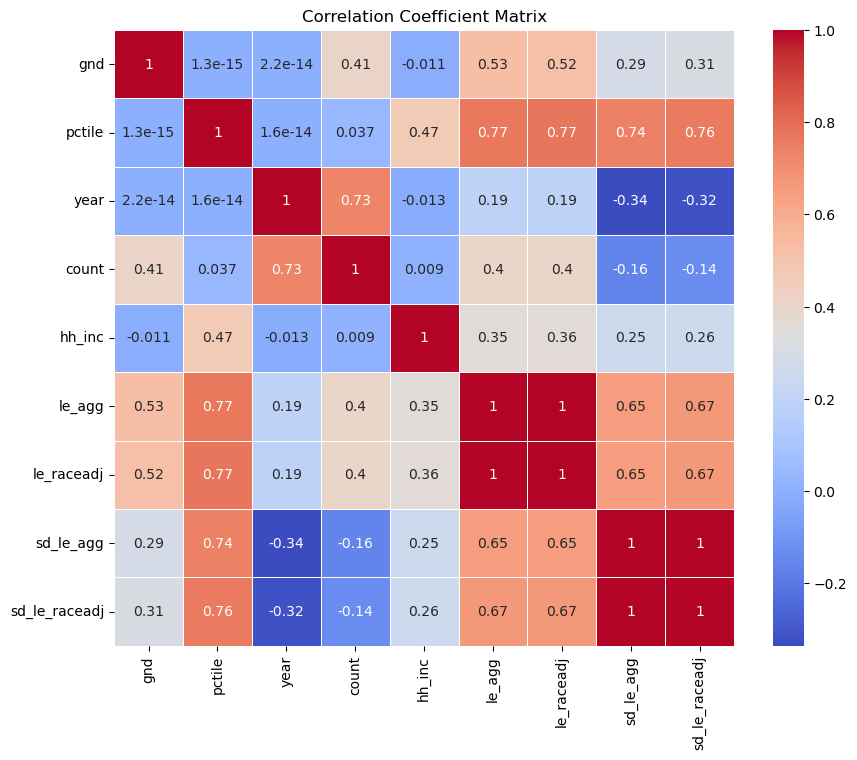

In [15]:
# Correlation in numerial data
# Assuming df_num is your DataFrame
correlation_matrix = df_num.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set plot title
plt.title('Correlation Coefficient Matrix')

# Display the plot
plt.show()

From this initial matrix, we can drop the race adjusted life expectancy from our analysis, as it is highly correlated with the aggregate life expectancy. This avoids redundancy and the issue of multicollinearity in analyzing the effects of changes in the independent variables on these dependent variables that are highly correlated with one another.

Because of high correlations some numeric variables we will remove them from our data.

In [16]:
#Drop one distinct numeric variables
columns_to_remove = ['le_raceadj', 'sd_le_raceadj']
df_num_dropped = df_num.drop(columns=columns_to_remove)
df_num_dropped

gnd  pctile  year   count        hh_inc     le_agg  sd_le_agg
0       1       1  2001  398740  4.991094e+02  79.682068   0.392838
1       1       1  2002  411159  5.413070e+02  79.183594   0.353981
2       1       1  2003  420298  5.291391e+02  79.364410   0.364780
3       1       1  2004  427728  4.992995e+02  79.898407   0.352018
4       1       1  2005  433665  4.741454e+02  80.283600   0.334612
...   ...     ...   ...     ...           ...        ...        ...
2795    0     100  2010  444908  1.915397e+06  88.769554   0.524046
2796    0     100  2011  441576  1.595813e+06  88.601631   0.572685
2797    0     100  2012  442401  1.828705e+06  88.127174   0.632195
2798    0     100  2013  439032  1.809494e+06  88.823898   0.576337
2799    0     100  2014  422080  1.334157e+06  89.698997   0.485407

[2800 rows x 7 columns]

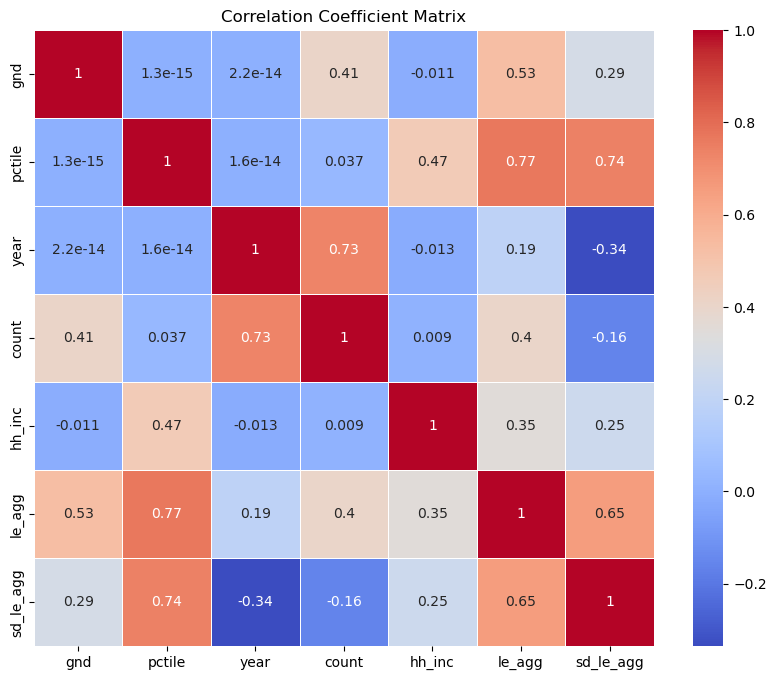

In [17]:
# Correlation in numerial data for df_num_dropped data
# Assuming df_num is your DataFrame
correlation_matrix = df_num_dropped.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set plot title
plt.title('Correlation Coefficient Matrix')

# Display the plot
plt.show()

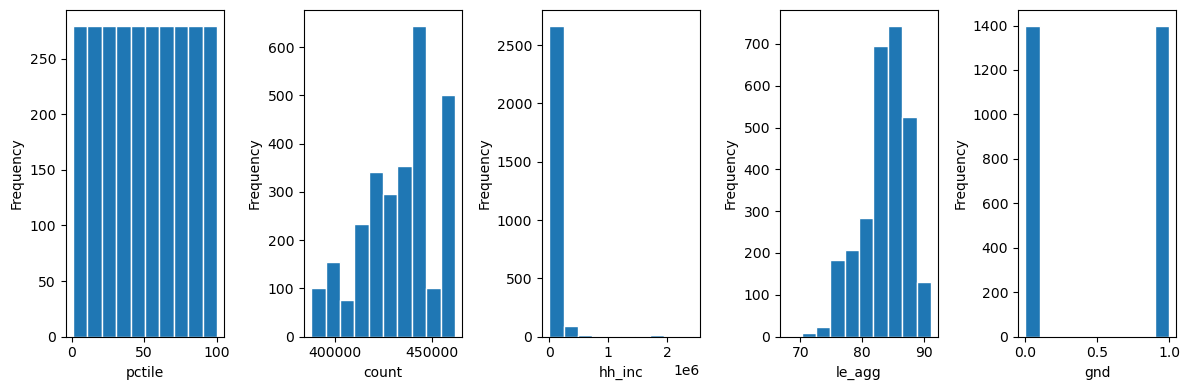

In [18]:
# Define the numerical variables
numerical_vars = ['pctile', 'count', 'hh_inc', 'le_agg', 'gnd']

# Create subplots for histograms
fig, axs = plt.subplots(1, len(numerical_vars), figsize=(12, 4))

# Plot histograms for each numerical variable
for i, var in enumerate(numerical_vars):
    axs[i].hist(df_num_dropped[var], edgecolor='white', align='mid')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

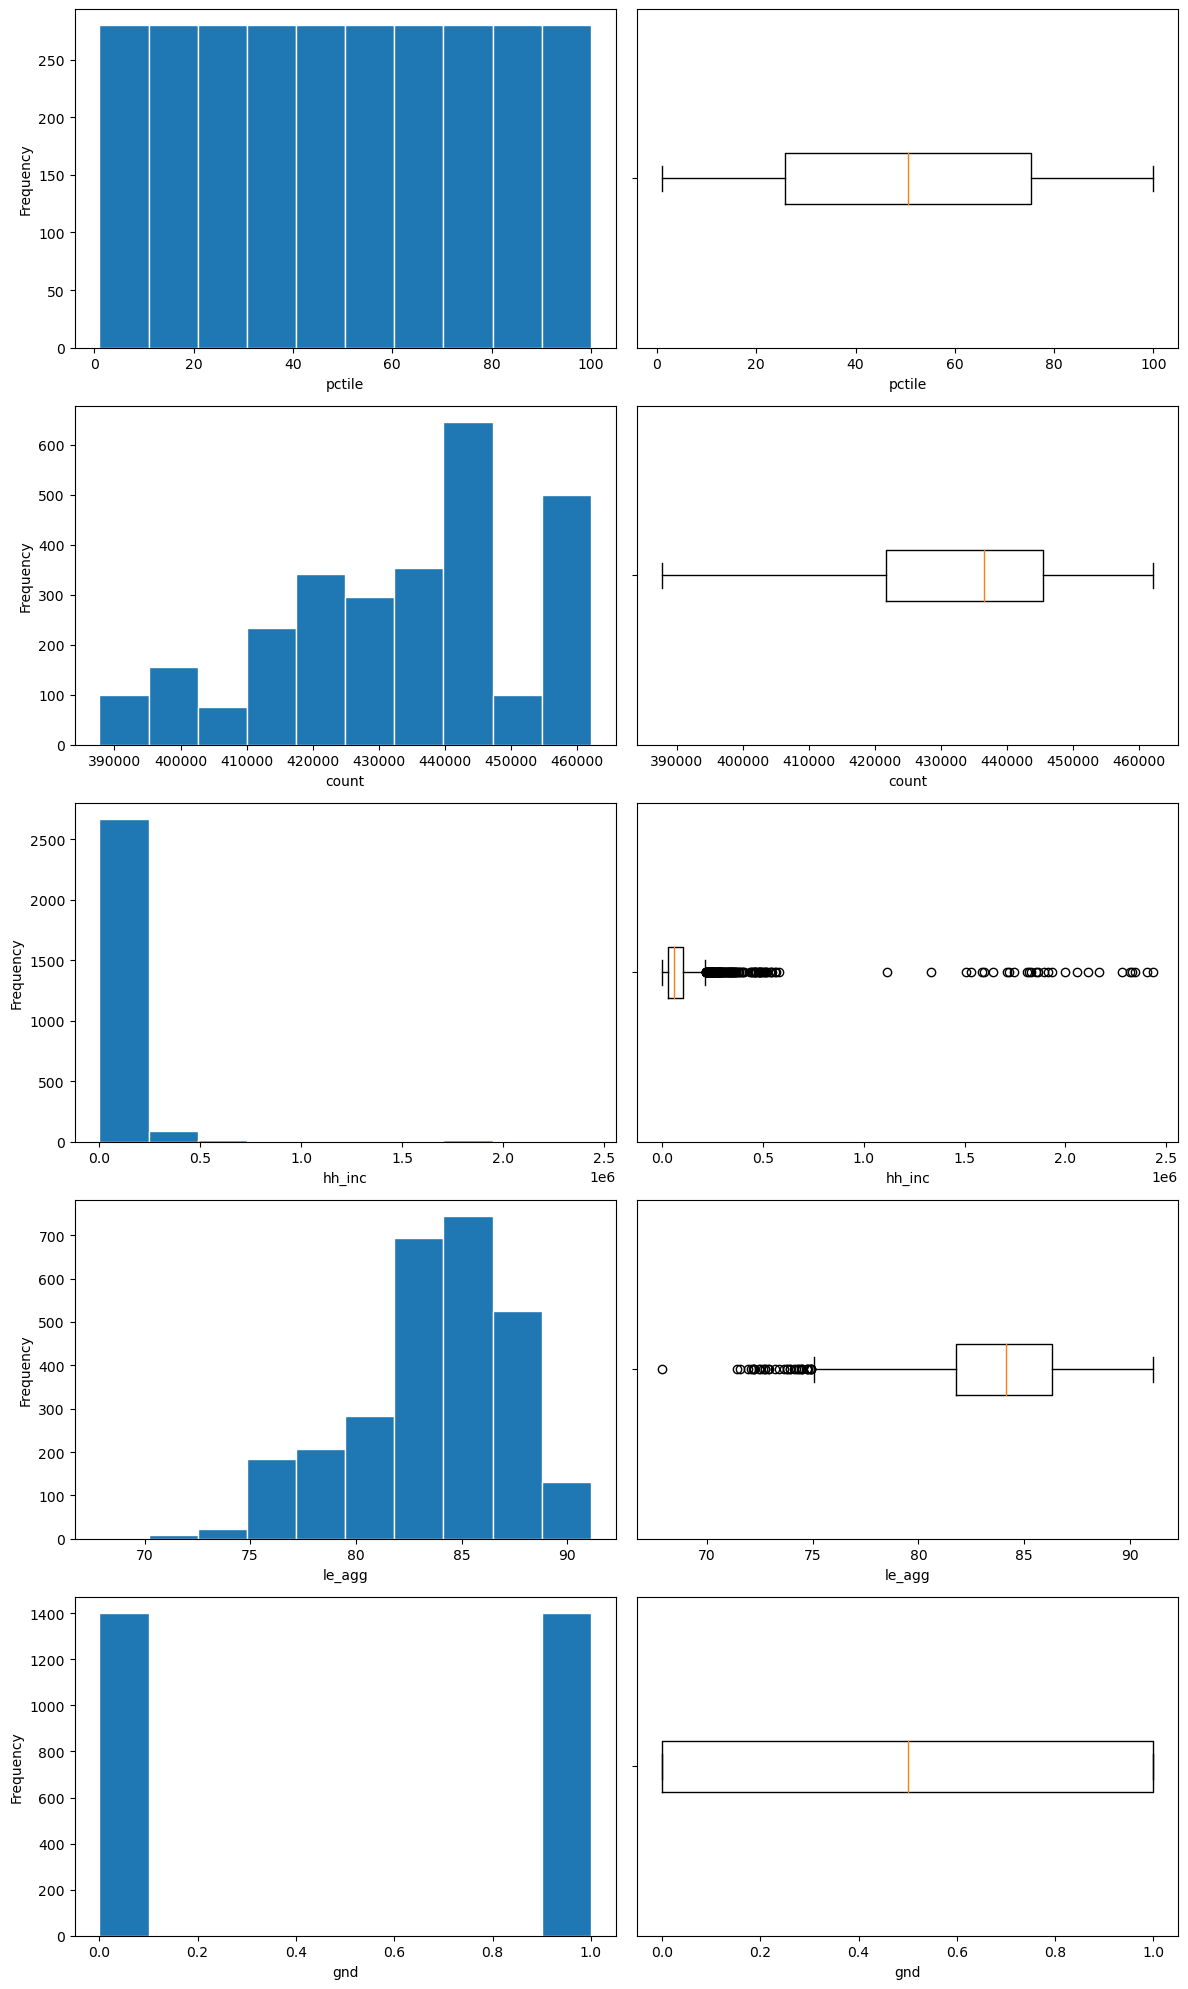

In [19]:
# Define the numerical variables
numerical_vars = ['pctile', 'count', 'hh_inc', 'le_agg', 'gnd']

# Create subplots for histograms and box plots
fig, axs = plt.subplots(len(numerical_vars), 2, figsize=(12, 4 * len(numerical_vars)))

# Plot histograms and box plots for each numerical variable
for i, var in enumerate(numerical_vars):
    # Plot histogram
    axs[i, 0].hist(df_num_dropped[var], edgecolor='white', align='mid')
    axs[i, 0].set_xlabel(var)
    axs[i, 0].set_ylabel('Frequency')

    # Plot box plot
    axs[i, 1].boxplot(df_num_dropped[var], vert=False)
    axs[i, 1].set_xlabel(var)
    axs[i, 1].set_yticklabels([])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [20]:
from scipy import stats

adjusted_var = 'hh_inc'

q_low = df[adjusted_var].quantile(0.05)
q_high = df[adjusted_var].quantile(0.95)

df_filtered = df[(df[adjusted_var] >= q_low) & (df[adjusted_var] <= q_high)].copy()

z_scores = stats.zscore(df_filtered[adjusted_var])

df_filtered = df_filtered[abs(z_scores) < 3]

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

hh_inc_values = df_filtered['hh_inc'].values.reshape(-1, 1)

scaled_hh_inc = scaler.fit_transform(hh_inc_values)

df_filtered['hh_inc_scaled'] = scaled_hh_inc


In [22]:
df_filtered

gnd  pctile  year   count       hh_inc     le_agg  le_raceadj  \
56      1       5  2001  399911    7560.2358  81.294067   81.390022   
57      1       5  2002  412534    7867.7437  82.267799   82.342102   
58      1       5  2003  421835    7753.2583  81.664673   81.745598   
59      1       5  2004  429350    7552.6816  81.705658   81.781387   
70      1       6  2001  399878    9163.8906  81.883217   81.959129   
...   ...     ...   ...     ...          ...        ...         ...   
2711    0      94  2010  444826  211740.7700  87.628914   87.725227   
2712    0      94  2011  441489  205220.5500  87.813232   87.905205   
2713    0      94  2012  442258  208083.9800  87.611290   87.695847   
2714    0      94  2013  438911  210773.2700  87.261612   87.373863   
2715    0      94  2014  421938  202931.9800  87.608711   87.720222   

      sd_le_agg  sd_le_raceadj  hh_inc_scaled  
56     0.504556       0.492849       0.000036  
57     0.433819       0.425242       0.001505  
58     0.461462       0.451978       0.000958  
59     0.442139       0.434488       0.000000  
70     0.495687       0.483780       0.007696  
...         ...            ...            ...  
2711   0.585171       0.572968       0.975364  
2712   0.580523       0.567354       0.944218  
2713   0.520693       0.510577       0.957896  
2714   0.625164       0.610447       0.970743  
2715   0.641983       0.627691       0.933286  

[2495 rows x 10 columns]

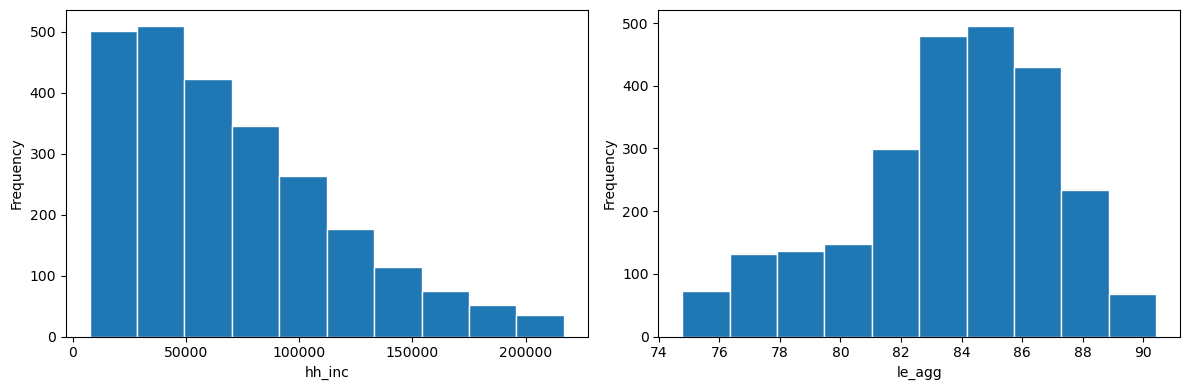

In [23]:
numerical_vars = ['hh_inc', 'le_agg']

# Create subplots for histograms
fig, axs = plt.subplots(1, len(numerical_vars), figsize=(12, 4))

# Plot histograms for each numerical variable
for i, var in enumerate(numerical_vars):
    axs[i].hist(df_filtered[var], edgecolor='white', align='mid')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

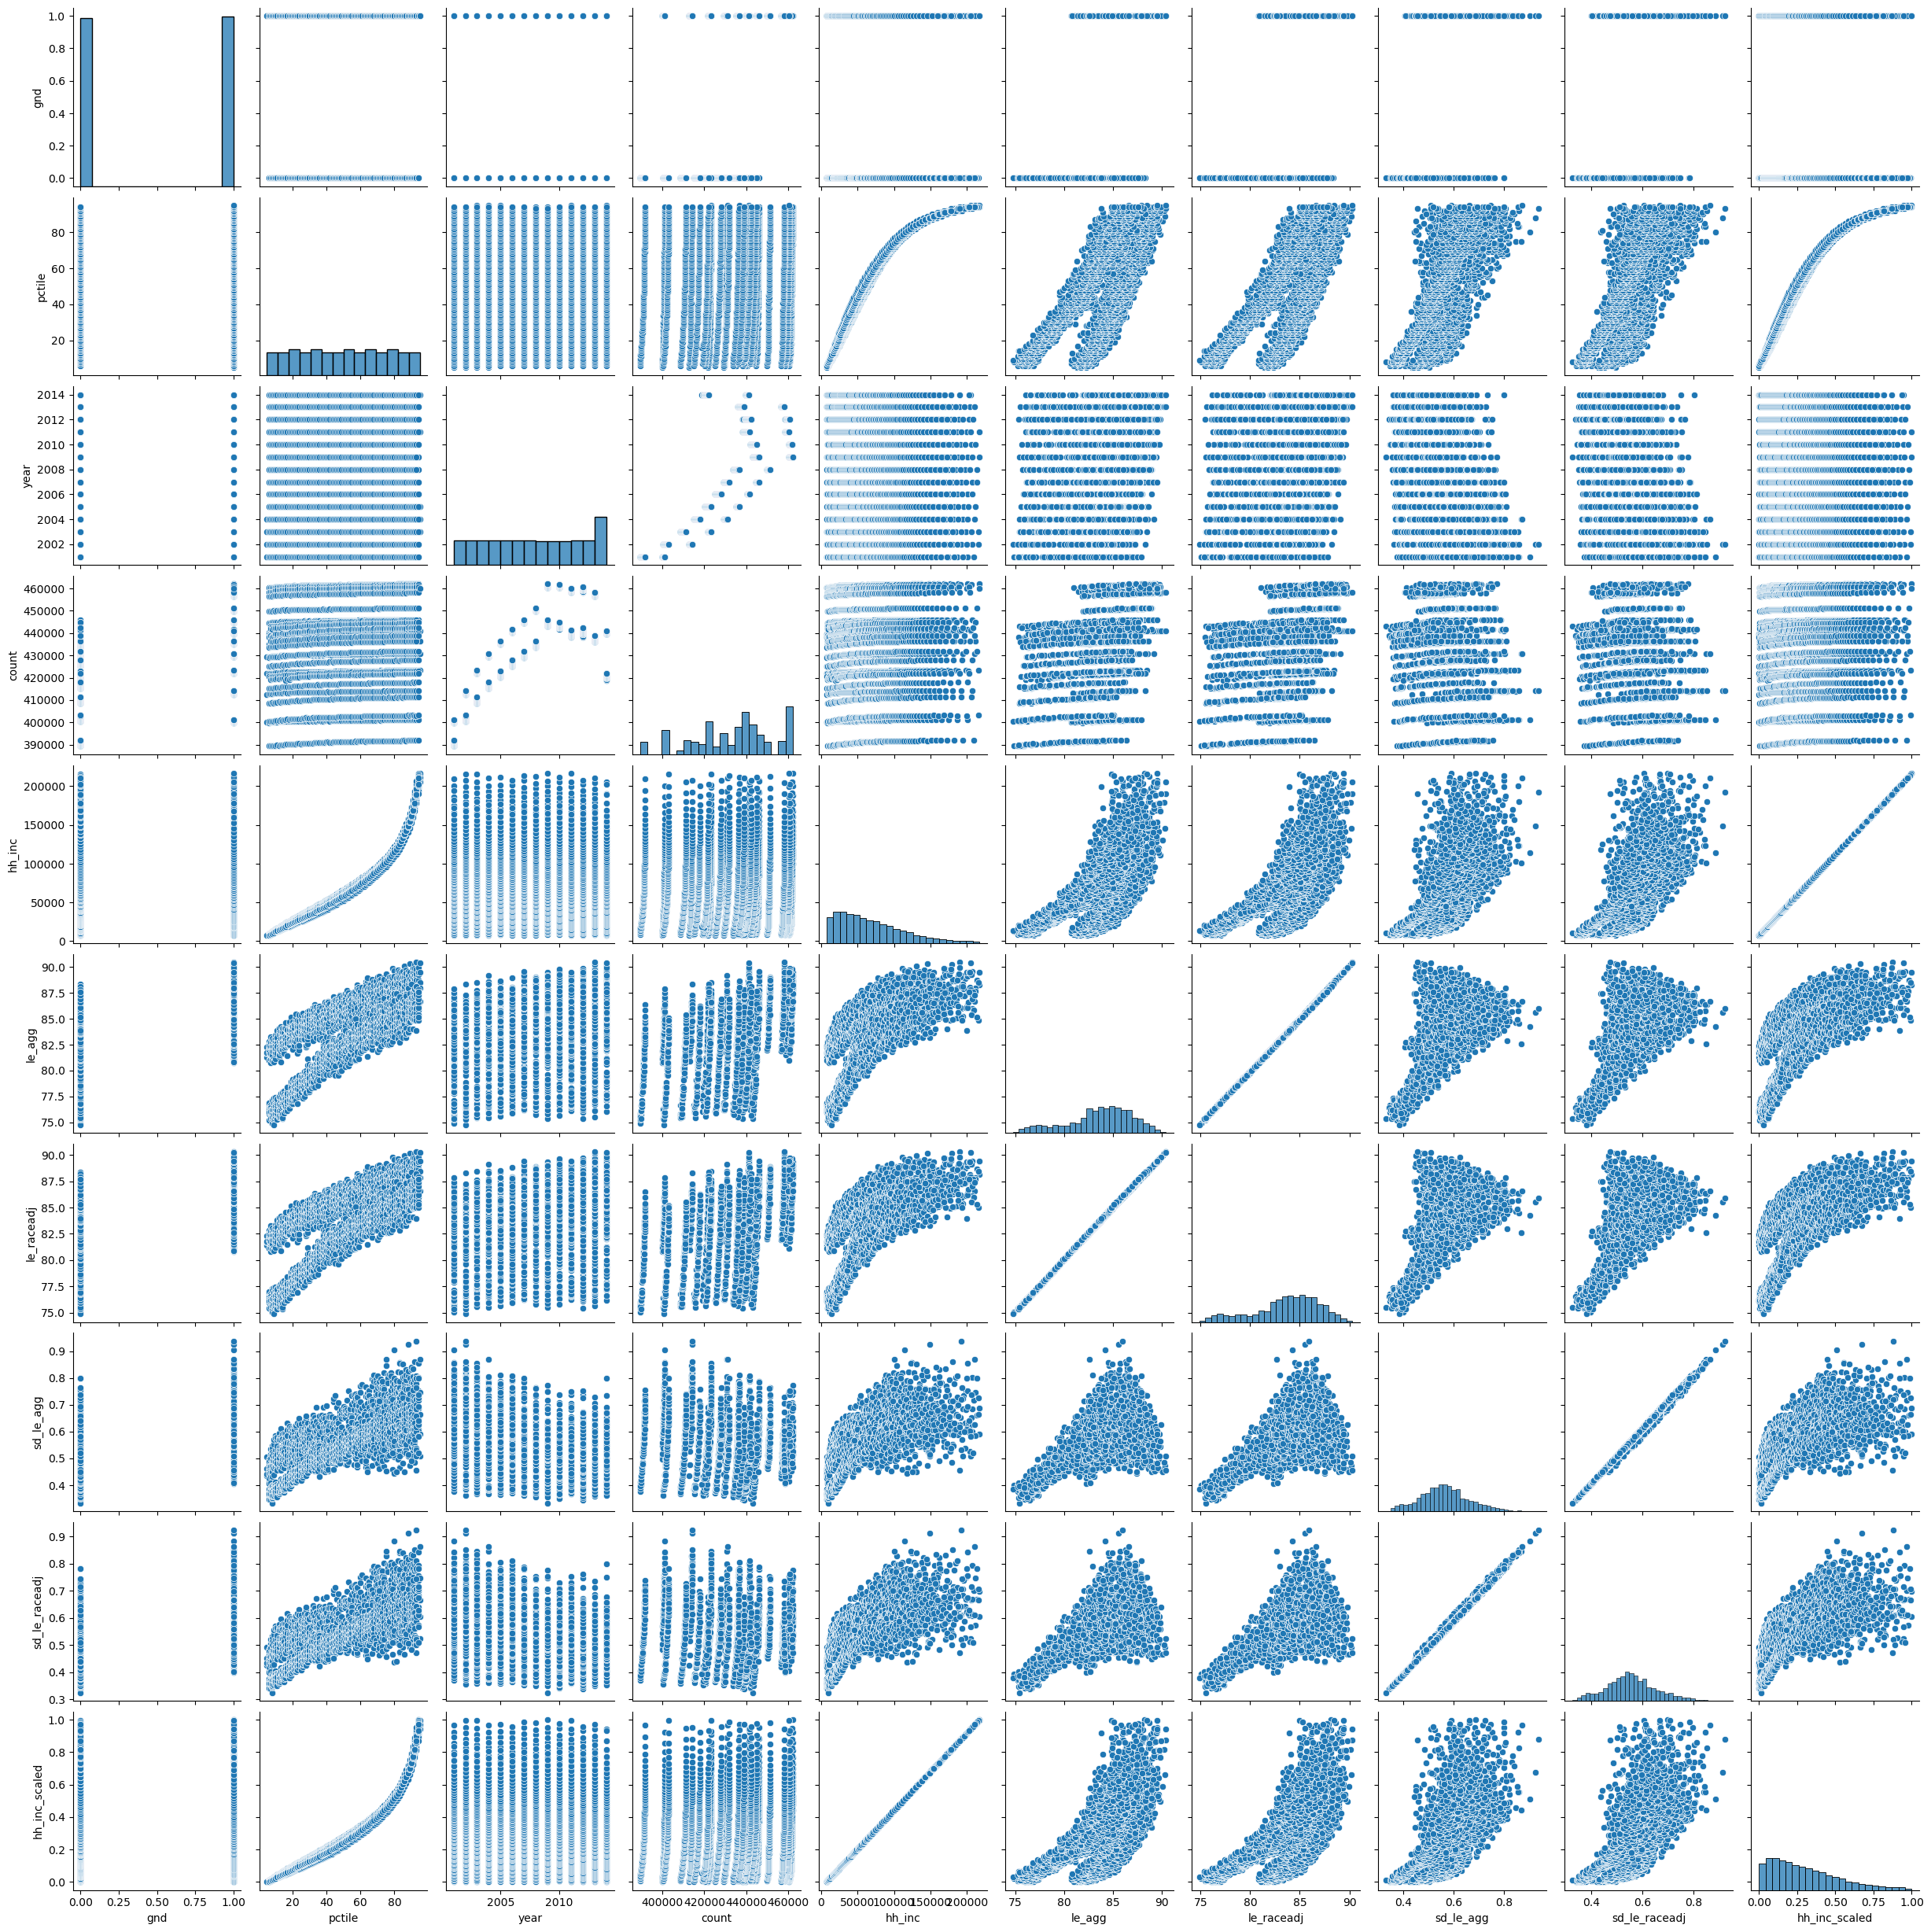

In [24]:
sns.pairplot(df_filtered)

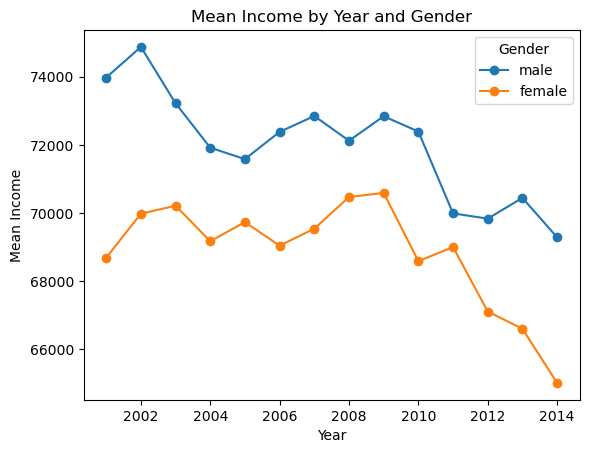

In [25]:
import matplotlib.pyplot as plt

# Calculate the mean income grouped by year and gender
mean_income_by_year_gender = df_filtered.groupby(['year', 'gnd'])['hh_inc'].mean().unstack()

# line plots
mean_income_by_year_gender.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Mean Income')
plt.title('Mean Income by Year and Gender')
plt.legend(labels=['male', 'female'], title='Gender')
plt.show()


From the graph, it is apparent that income exhibits an overall declining trend over time, with male income surpassing that of females.

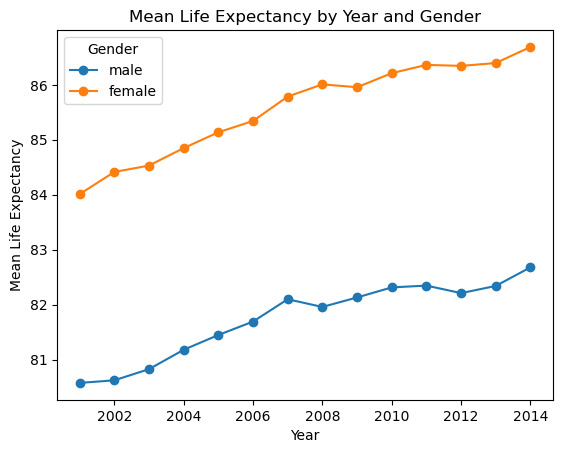

In [26]:
import matplotlib.pyplot as plt

mean_income_by_year_gender = df_filtered.groupby(['year', 'gnd'])['le_agg'].mean().unstack()

mean_income_by_year_gender.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Mean Life Expectancy')
plt.title('Mean Life Expectancy by Year and Gender')
plt.legend(labels=['male', 'female'], title='Gender')
plt.show()


From the graph, it is evident that life expectancy demonstrates an overall upward trend over time, with females exhibiting higher life expectancy compared to males.

In [27]:
import numpy as np

df_filtered['hh_inc_log'] = np.log(df_filtered['hh_inc'])

In [28]:
df_selected = pd.DataFrame(df_filtered, columns=['le_agg','gnd', 'hh_inc_log','hh_inc_scaled','year'])
df_selected

le_agg  gnd  hh_inc_log  hh_inc_scaled  year
56    81.294067    1    8.930658       0.000036  2001
57    82.267799    1    8.970527       0.001505  2002
58    81.664673    1    8.955868       0.000958  2003
59    81.705658    1    8.929658       0.000000  2004
70    81.883217    1    9.123026       0.007696  2001
...         ...  ...         ...            ...   ...
2711  87.628914    0   12.263118       0.975364  2010
2712  87.813232    0   12.231841       0.944218  2011
2713  87.611290    0   12.245697       0.957896  2012
2714  87.261612    0   12.258538       0.970743  2013
2715  87.608711    0   12.220626       0.933286  2014

[2495 rows x 5 columns]

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_selected)

# Access the principal components and explained variance ratio
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

# Print the principal components and explained variance ratio
print("Principal Components:")
print(principal_components)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)

Principal Components:
[[-4.10821382e-01 -2.26023617e-02 -3.55840643e-02 -1.03534972e-02
  -9.10681890e-01]
 [-8.90664006e-01 -8.71981247e-02 -1.67403600e-01 -4.63663179e-02
   4.11023497e-01]
 [ 8.86235638e-02  5.89729319e-01 -7.73764983e-01 -2.12533440e-01
  -2.19654780e-02]
 [-1.73448737e-01  8.02526243e-01  5.51837674e-01  1.41797919e-01
   3.51524833e-02]
 [-2.19554041e-03  7.52201646e-03 -2.59755157e-01  9.65642717e-01
  -2.48992821e-05]]

Explained Variance Ratio:
[6.27454289e-01 3.56366564e-01 1.47933936e-02 1.15262806e-03
 2.33125333e-04]


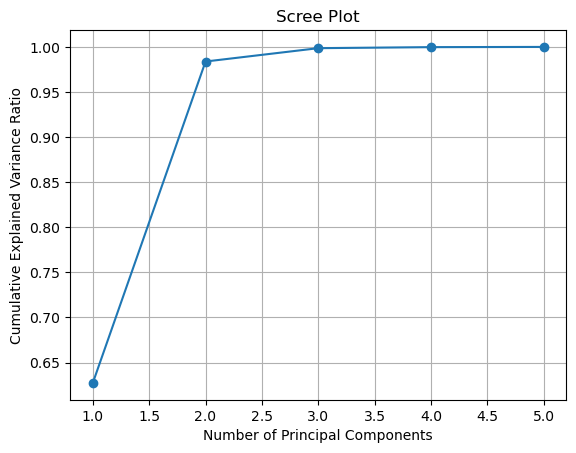

In [30]:
# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

Next, we found it appropriate to prepare our data for ML modeling by performing a principal component analysis to isolate relevant factors.The first component in PCA can explain approximately 62% of the variance, and together, the first two components account for nearly 98% of the variance. Therefore, it can be concluded that two components are sufficient for PCA analysis of this dataset.

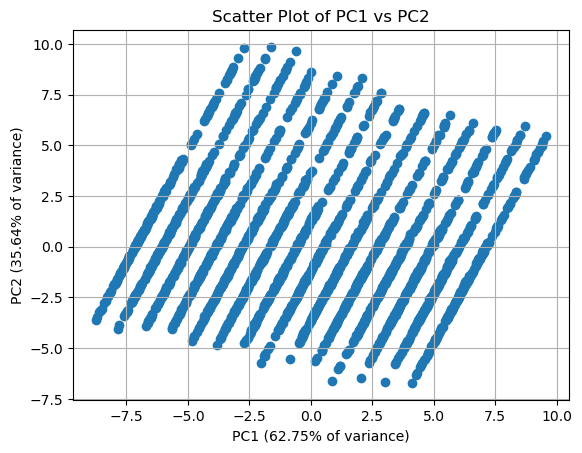

In [31]:
import matplotlib.pyplot as plt

# Create a PCA object
pca = PCA(n_components=2)  # Set the number of components to 2 for PC1 and PC2

# Fit the PCA model to the scaled data and transform it
principal_components = pca.fit_transform(df_selected)

# Create a scatter plot of PC1 and PC2 散点图
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('PC1 ({:.2f}% of variance)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 ({:.2f}% of variance)'.format(pca.explained_variance_ratio_[1]*100))
plt.title('Scatter Plot of PC1 vs PC2')
plt.grid(True)
plt.show()


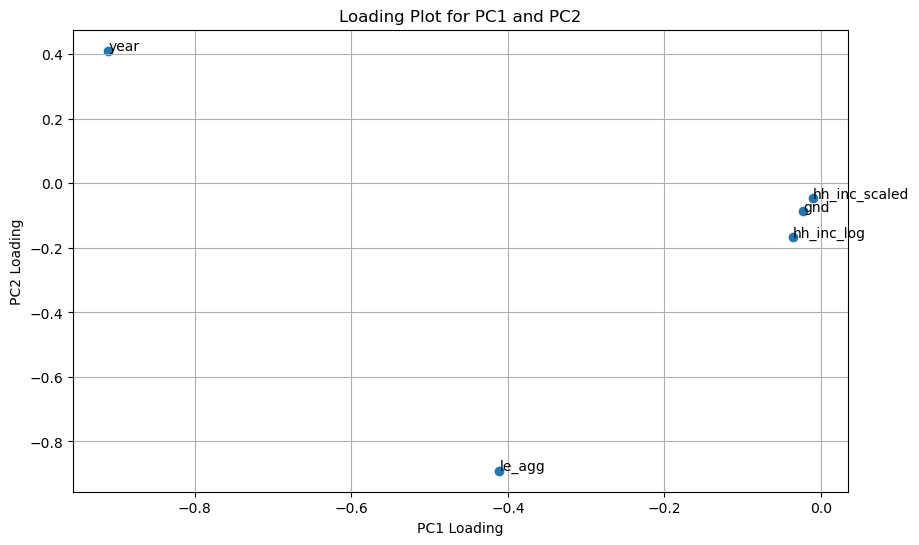

In [32]:
import matplotlib.pyplot as plt

# Create a PCA object
pca = PCA(n_components=2)  # Set the number of components to 2 for PC1 and PC2

# Fit the PCA model to the scaled data and transform it
principal_components = pca.fit_transform(df_selected)

# Get the principal component loadings
loadings = pca.components_.T

# Create a loading plot for PC1 and PC2
plt.figure(figsize=(10, 6))
plt.scatter(loadings[:, 0], loadings[:, 1])
plt.xlabel('PC1 Loading')
plt.ylabel('PC2 Loading')
plt.title('Loading Plot for PC1 and PC2')
plt.grid(True)

# Add labels for each feature
for i, feature in enumerate(df_selected.columns):
    plt.annotate(feature, (loadings[i, 0], loadings[i, 1]))

plt.show()

## Modeling (30 points)

In this section, you should use data science and machine learning techniques to improve econometric analysis in the papers you will pick, preferably. If you are unable to carry out econometric analysis, you will make predictions using the most appropriate ML algorithms. Start with baseline models, as we did during the lectures, and improve the models using the appropriate regularization methods, and pick the best prediction for unseen future data after model evaluation. Use some ML models only for feature importance, which also should be used as a linkage with econometric analysis. Again, follow the workflow in our in-class coding practices. 

In [33]:
import numpy as np
import pandas as pd

# convert the 'year' column to numeric type
df_filtered['year'] = pd.to_numeric(df_filtered['year'], errors='coerce')

# reorder year
df_filtered['year'] = df_filtered['year'] - 2000

df_filtered = df_filtered.drop(['count','sd_le_agg','sd_le_raceadj'], axis=1)

scaler = MinMaxScaler()  # or StandardScaler()
df_filtered['le_agg_scaled'] = scaler.fit_transform(df_filtered[['le_agg']])
df_filtered['le_raceadj_scaled'] = scaler.fit_transform(df_filtered[['le_raceadj']])


In [34]:
from statsmodels.formula.api import ols

regress_scaled = ols('le_agg_scaled ~ gnd+hh_inc_scaled+year',df_filtered).fit()
print(regress_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:          le_agg_scaled   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     4673.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:08:52   Log-Likelihood:                 2703.3
No. Observations:                2495   AIC:                            -5399.
Df Residuals:                    2491   BIC:                            -5375.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1522      0.005     33.817

In [35]:
from statsmodels.formula.api import ols

regress_log = ols('le_agg ~ gnd',df_filtered).fit()
print(regress_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 le_agg   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     1260.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          9.60e-224
Time:                        17:08:52   Log-Likelihood:                -6009.7
No. Observations:                2495   AIC:                         1.202e+04
Df Residuals:                    2493   BIC:                         1.204e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.7443      0.076   1069.421      0.0

In [36]:
from statsmodels.formula.api import ols

regress_log = ols('le_agg ~ gnd+hh_inc_log',df_filtered).fit()
print(regress_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 le_agg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     7092.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:08:52   Log-Likelihood:                -4148.7
No. Observations:                2495   AIC:                             8303.
Df Residuals:                    2492   BIC:                             8321.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.0925      0.376    125.334      0.0

In [37]:
from statsmodels.formula.api import ols

regress_log = ols('le_agg ~ gnd+hh_inc_log+year',df_filtered).fit()
print(regress_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 le_agg   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     8498.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:08:52   Log-Likelihood:                -3502.3
No. Observations:                2495   AIC:                             7013.
Df Residuals:                    2491   BIC:                             7036.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.1540      0.294    153.663      0.0

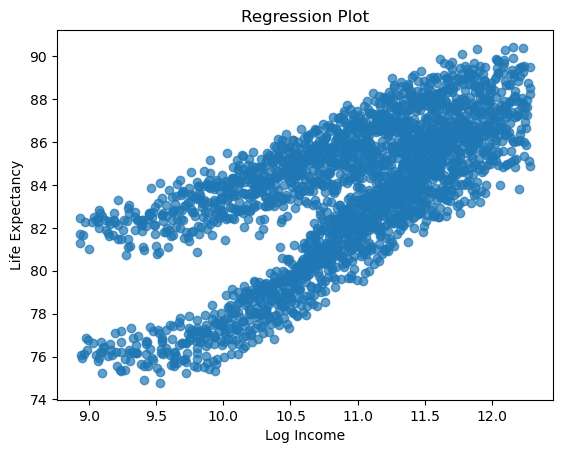

In [38]:
import matplotlib.pyplot as plt

plt.scatter(df_filtered['hh_inc_log'], df_filtered['le_agg'], alpha=0.7)

plt.xlabel('Log Income')
plt.ylabel('Life Expectancy')
plt.title('Regression Plot')

plt.show()


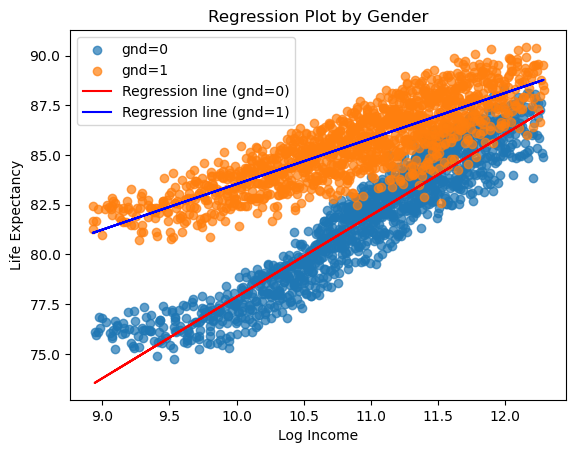

In [39]:
df_gnd0 = df_filtered[df_filtered['gnd'] == 0]
df_gnd1 = df_filtered[df_filtered['gnd'] == 1]

reg0 = ols('le_agg ~ hh_inc_log', df_gnd0).fit()
reg1 = ols('le_agg ~ hh_inc_log', df_gnd1).fit()

import matplotlib.pyplot as plt

plt.scatter(df_gnd0['hh_inc_log'], df_gnd0['le_agg'], alpha=0.7, label='gnd=0')
plt.scatter(df_gnd1['hh_inc_log'], df_gnd1['le_agg'], alpha=0.7, label='gnd=1')

plt.plot(df_gnd0['hh_inc_log'], reg0.predict(df_gnd0), color='red', label='Regression line (gnd=0)')
plt.plot(df_gnd1['hh_inc_log'], reg1.predict(df_gnd1), color='blue', label='Regression line (gnd=1)')

plt.xlabel('Log Income')
plt.ylabel('Life Expectancy')
plt.title('Regression Plot by Gender')

plt.legend()

plt.show()


Next, we calculated the minitab output of running a regression of log income on life expectancy, to examine the gender-based relationship of income to life expectancy, neatly fitting a linear model. In the regression results, we can observe the slopes of the various factors, and the R-square value has reached 91.1%, indicating an excellent fit.

In [40]:
df_selected = pd.DataFrame(df_filtered, columns=['le_agg','gnd', 'hh_inc_log','hh_inc_scaled','year'])
df_selected

le_agg  gnd  hh_inc_log  hh_inc_scaled  year
56    81.294067    1    8.930658       0.000036     1
57    82.267799    1    8.970527       0.001505     2
58    81.664673    1    8.955868       0.000958     3
59    81.705658    1    8.929658       0.000000     4
70    81.883217    1    9.123026       0.007696     1
...         ...  ...         ...            ...   ...
2711  87.628914    0   12.263118       0.975364    10
2712  87.813232    0   12.231841       0.944218    11
2713  87.611290    0   12.245697       0.957896    12
2714  87.261612    0   12.258538       0.970743    13
2715  87.608711    0   12.220626       0.933286    14

[2495 rows x 5 columns]

In [41]:
# load the data
data = df_selected

# split the data into features and target variable
X = data[['hh_inc_scaled','gnd']]
y = data['le_agg']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the models
lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
en = ElasticNet(alpha=0.1)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
svr = SVR()

# fit the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
en.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svr.fit(X_train, y_train)

# predict the target variable for test set using the models
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
en_pred = en.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svr_pred = svr.predict(X_test)

# calculate r-squared and mean squared error for the models
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

en_r2 = r2_score(y_test, en_pred)
en_mse = mean_squared_error(y_test, en_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

# print the r-squared and mean squared error for the models
print("Linear Regression R-squared: {:.3f}, MSE: {:.3f}".format(lr_r2, lr_mse))
print("Lasso Regression R-squared: {:.3f}, MSE: {:.3f}".format(lasso_r2, lasso_mse))
print("Ridge Regression R-squared: {:.3f}, MSE: {:.3f}".format(ridge_r2, ridge_mse))
print("ElasticNet R-squared: {:.3f}, MSE: {:.3f}".format(en_r2, en_mse))
print("Decision Trees Regression R-squared: {:.3f}, MSE: {:.3f}".format(dt_r2, dt_mse))
print("Random Forest Regression R-squared: {:.3f}, MSE: {:.3f}".format(rf_r2, rf_mse))
print("XGBoost Regression R-squared: {:.3f}, MSE: {:.3f}".format(xgb_r2, xgb_mse))
print("SVM Regression R-squared: {:.3f}, MSE: {:.3f}".format(svr_r2, svr_mse))

Linear Regression R-squared: 0.815, MSE: 2.136
Lasso Regression R-squared: 0.774, MSE: 2.611
Ridge Regression R-squared: 0.815, MSE: 2.137
ElasticNet R-squared: 0.629, MSE: 4.286
Decision Trees Regression R-squared: 0.819, MSE: 2.088
Random Forest Regression R-squared: 0.868, MSE: 1.523
XGBoost Regression R-squared: 0.891, MSE: 1.256
SVM Regression R-squared: 0.908, MSE: 1.068


We do the regression of life expectancy on income and gender.

We seek to predict what the relationship will be between our key variables of interest. 

From the results that our group established, we can observe that Random Forest, XGBoost and SVM Regression exhibit the best regression performance. This is evident from them having the highest R-square values and the lowest mean squared error (MSE) values.

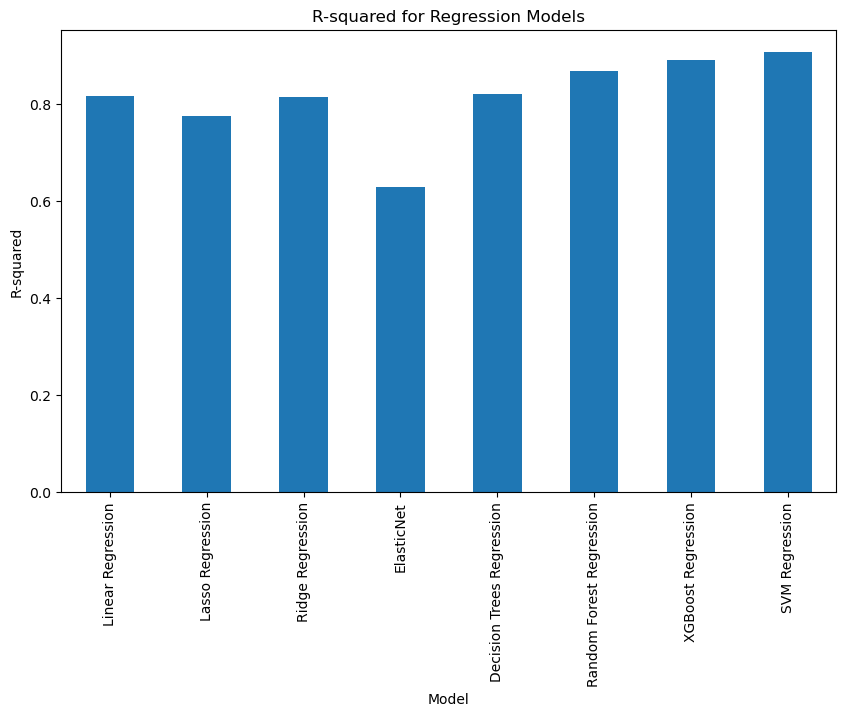

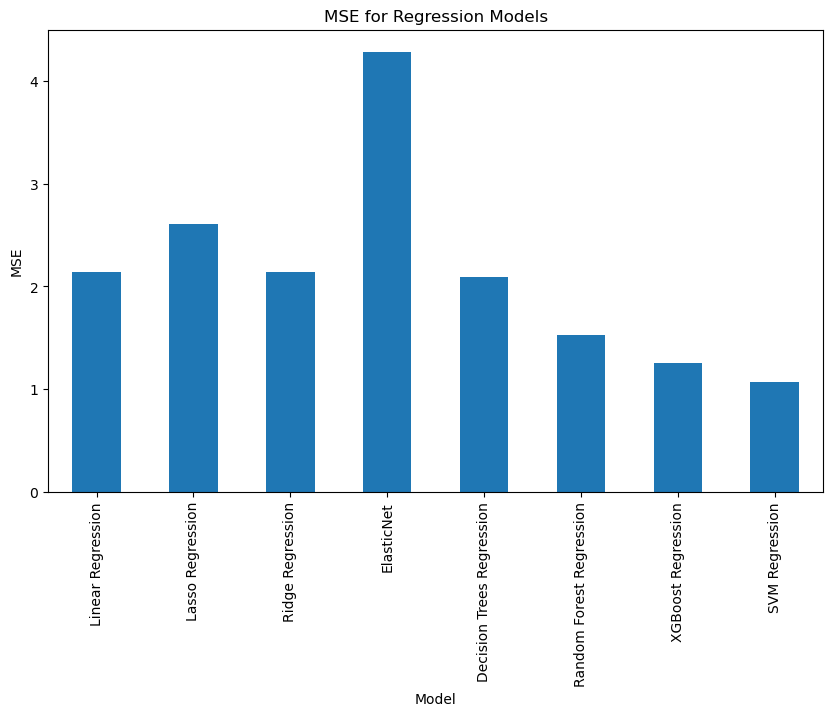

In [42]:
# create a dictionary to store the R-squared and MSE for each model
results = {'Linear Regression': [lr_r2, lr_mse],
           'Lasso Regression': [lasso_r2, lasso_mse],
           'Ridge Regression': [ridge_r2, ridge_mse],
           'ElasticNet': [en_r2, en_mse],
           'Decision Trees Regression': [dt_r2, dt_mse],
           'Random Forest Regression': [rf_r2, rf_mse],
           'XGBoost Regression': [xgb_r2, xgb_mse],
           'SVM Regression': [svr_r2, svr_mse]}

# convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R-squared', 'MSE'])

# create a bar plot of the R-squared values
ax = results_df['R-squared'].plot(kind='bar', figsize=(10,6))
ax.set_title('R-squared for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
plt.show()

# create a bar plot of the MSE values
ax = results_df['MSE'].plot(kind='bar', figsize=(10,6))
ax.set_title('MSE for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
plt.show()

Examining R-square and MSE on respective bar charts, we bear in mind that a higher R-squared value suggests that a larger proportion of the variability in the dependent variable is accounted for by the independent variables, indicating a better fit of the model to the data. 

From the first chart, random forest, xgboost and svm have high r-squared values, while ElasticNet, for instance, has a low r-squared value. However, R-squared alone does not indicate the quality or validity of the model, so that is why we also have the MSE graph on the second grapg, keeping in mind that MSE provides a quantitative measure of the model's average prediction error, with lower values indicating better predictive accuracy. 

Comparing MSE across different models can help determine which model performs better in terms of prediction accuracy. In our case, random forest, xgboost and svm, again indicates the lowest three MSE results. The quality of having high R-squared and low MSE makes these three models the most favourable ones. 


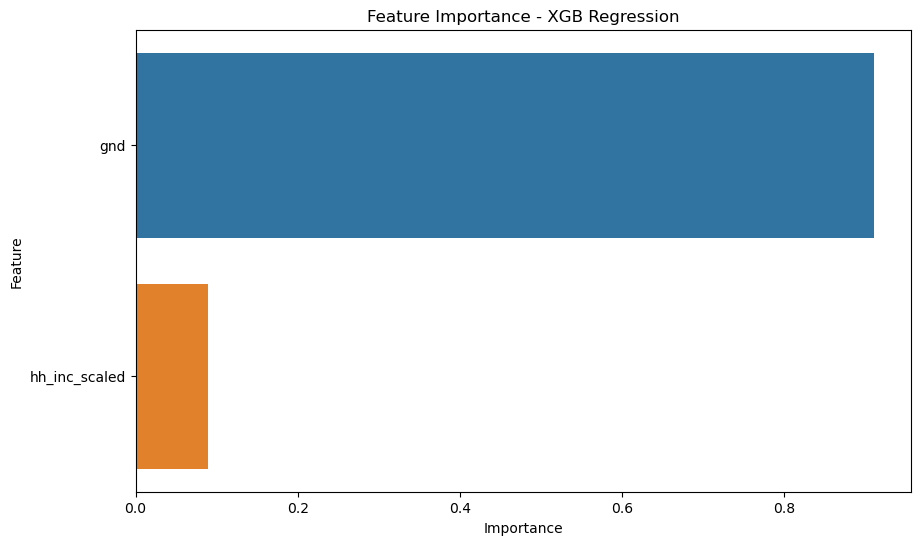

In [43]:
# Calculate feature importance for XGB Regressor
xgb_feature_importance = xgb.feature_importances_

# Create a DataFrame to store the feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_feature_importance})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - XGB Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [44]:
# predict the target variable for test set using the models
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_en = en.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_svr = svr.predict(X_test)

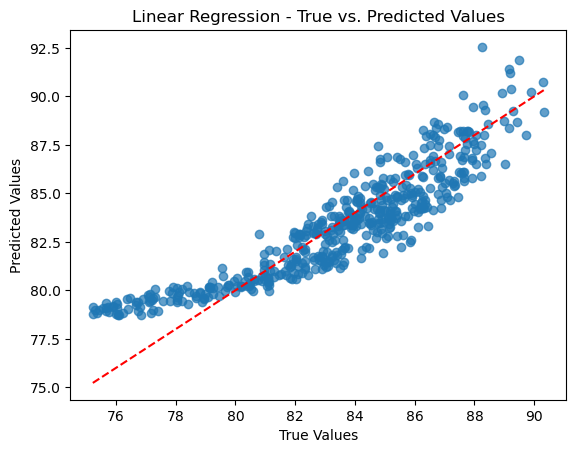

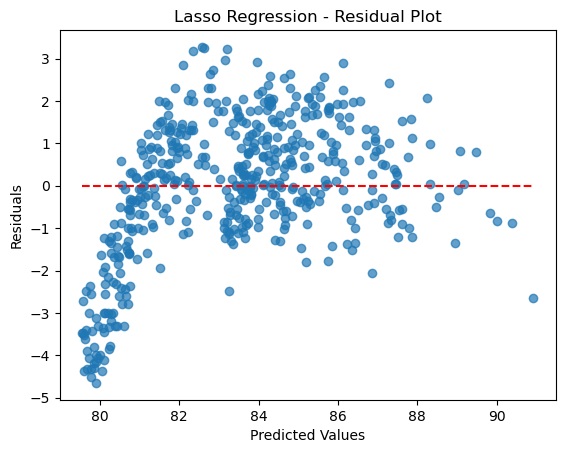

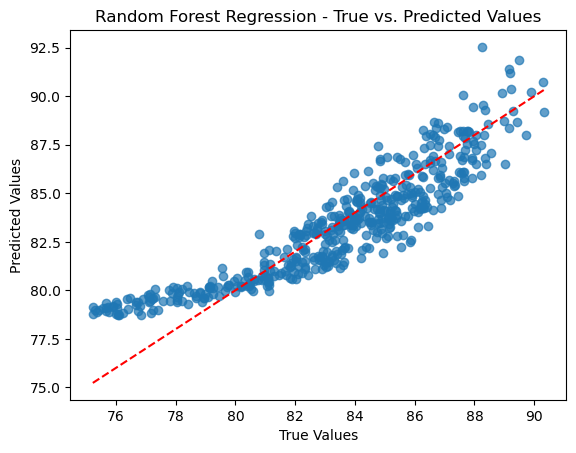

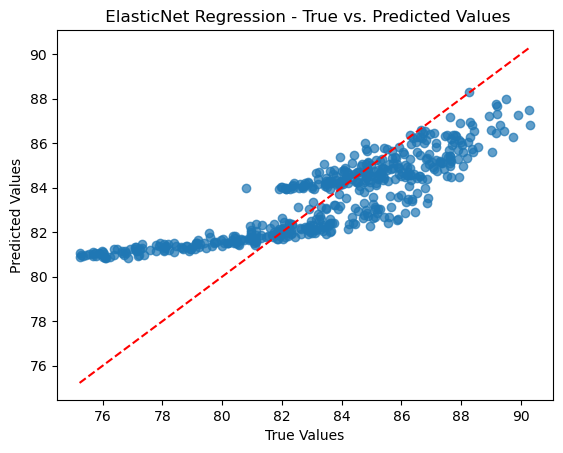

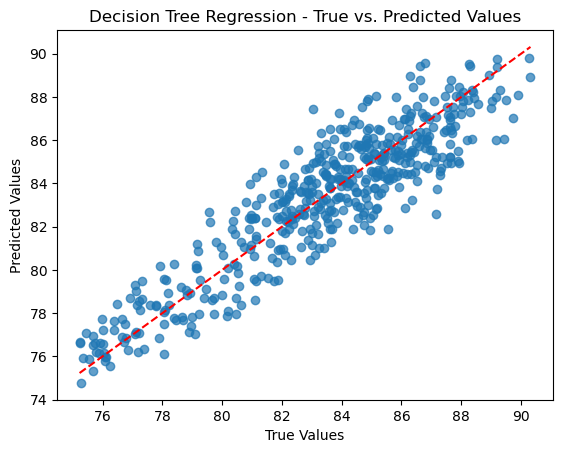

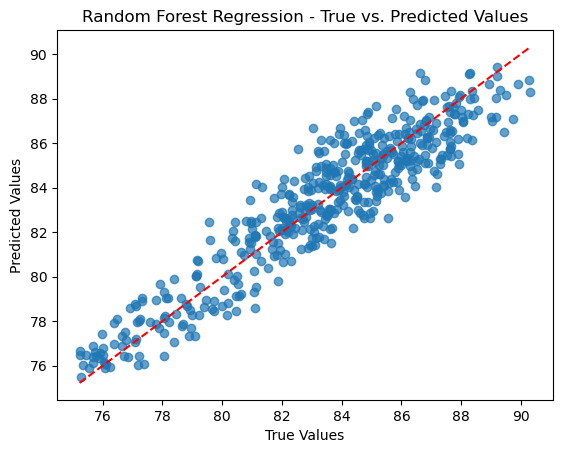

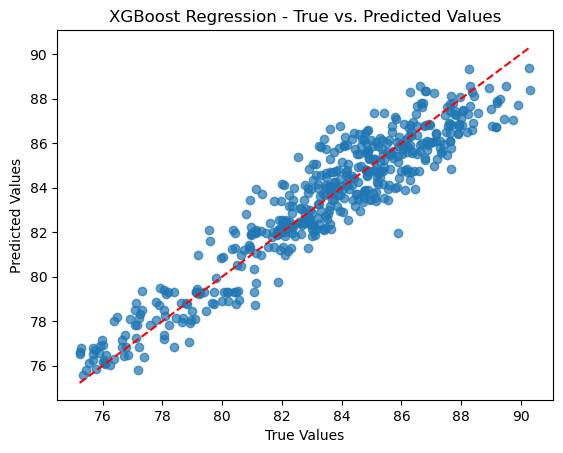

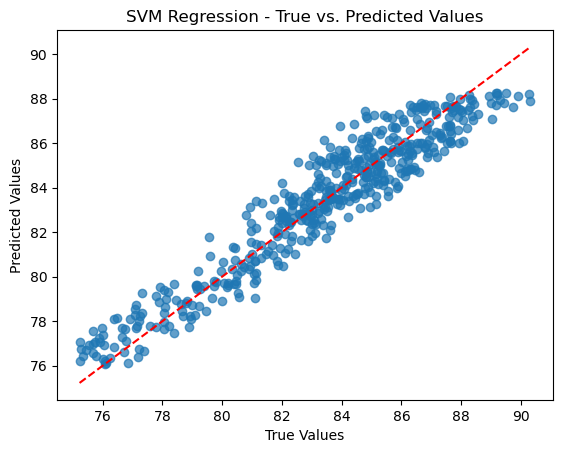

In [45]:
import matplotlib.pyplot as plt

# scatter plot for linear regression
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression - True vs. Predicted Values')
plt.show()

# residual plot for lasso
plt.scatter(y_pred_lasso, y_test - y_pred_lasso, alpha=0.7)
plt.plot([min(y_pred_lasso), max(y_pred_lasso)], [0, 0], color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Lasso Regression - Residual Plot')
plt.show()

# scatter plot for ridge
plt.scatter(y_test, y_pred_ridge, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression - True vs. Predicted Values')
plt.show()

# scatter plot for ridge
plt.scatter(y_test, y_pred_en, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(' ElasticNet Regression - True vs. Predicted Values')
plt.show()

# scatter plot for decision tree
plt.scatter(y_test, y_pred_dt, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression - True vs. Predicted Values')
plt.show()

# scatter plot for random forest
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression - True vs. Predicted Values')
plt.show()

# scatter plot for XGBoost
plt.scatter(y_test, y_pred_xgb, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regression - True vs. Predicted Values')
plt.show()

# scatter plot for SVM
plt.scatter(y_test, y_pred_svr, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('SVM Regression - True vs. Predicted Values')
plt.show()


X-axis is the true value while Y-axis is the predicted values.

With the use of different models, we seek to predict the target variable for the test set using the models. If the model's predictions are perfect, all points would fall on the red dashed line (line of perfect prediction). Deviations from this line indicate prediction errors, which is evident in one of the cases, but not all.


Linear Regression
R-squared: 0.8631394455760896
Mean Squared Error: 1.582167534524629
Root Mean Squared Error: 1.2578424124367207

Lasso
R-squared: 0.29179196062100343
Mean Squared Error: 8.18719295936908
Root Mean Squared Error: 2.861327132532923

Ridge
R-squared: 0.8630065661781015
Mean Squared Error: 1.583703678159213
Root Mean Squared Error: 1.2584528907190817

ElasticNet
R-squared: 0.37371868355011684
Mean Squared Error: 7.240084409545816
Root Mean Squared Error: 2.6907404946493476

Decision Tree
R-squared: 0.8196997596467629
Mean Squared Error: 2.084349197288079
Root Mean Squared Error: 1.4437275356825745

Random Forest
R-squared: 0.8683687062899457
Mean Squared Error: 1.5217150062862748
Root Mean Squared Error: 1.2335781314072793

XGBoost
R-squared: 0.8950228570290777
Mean Squared Error: 1.2135814309307396
Root Mean Squared Error: 1.101626720323513

Support Vector Regression
R-squared: 0.8729809774158364
Mean Squared Error: 1.468395146034893
Root Mean Squared Error: 1.2117735539

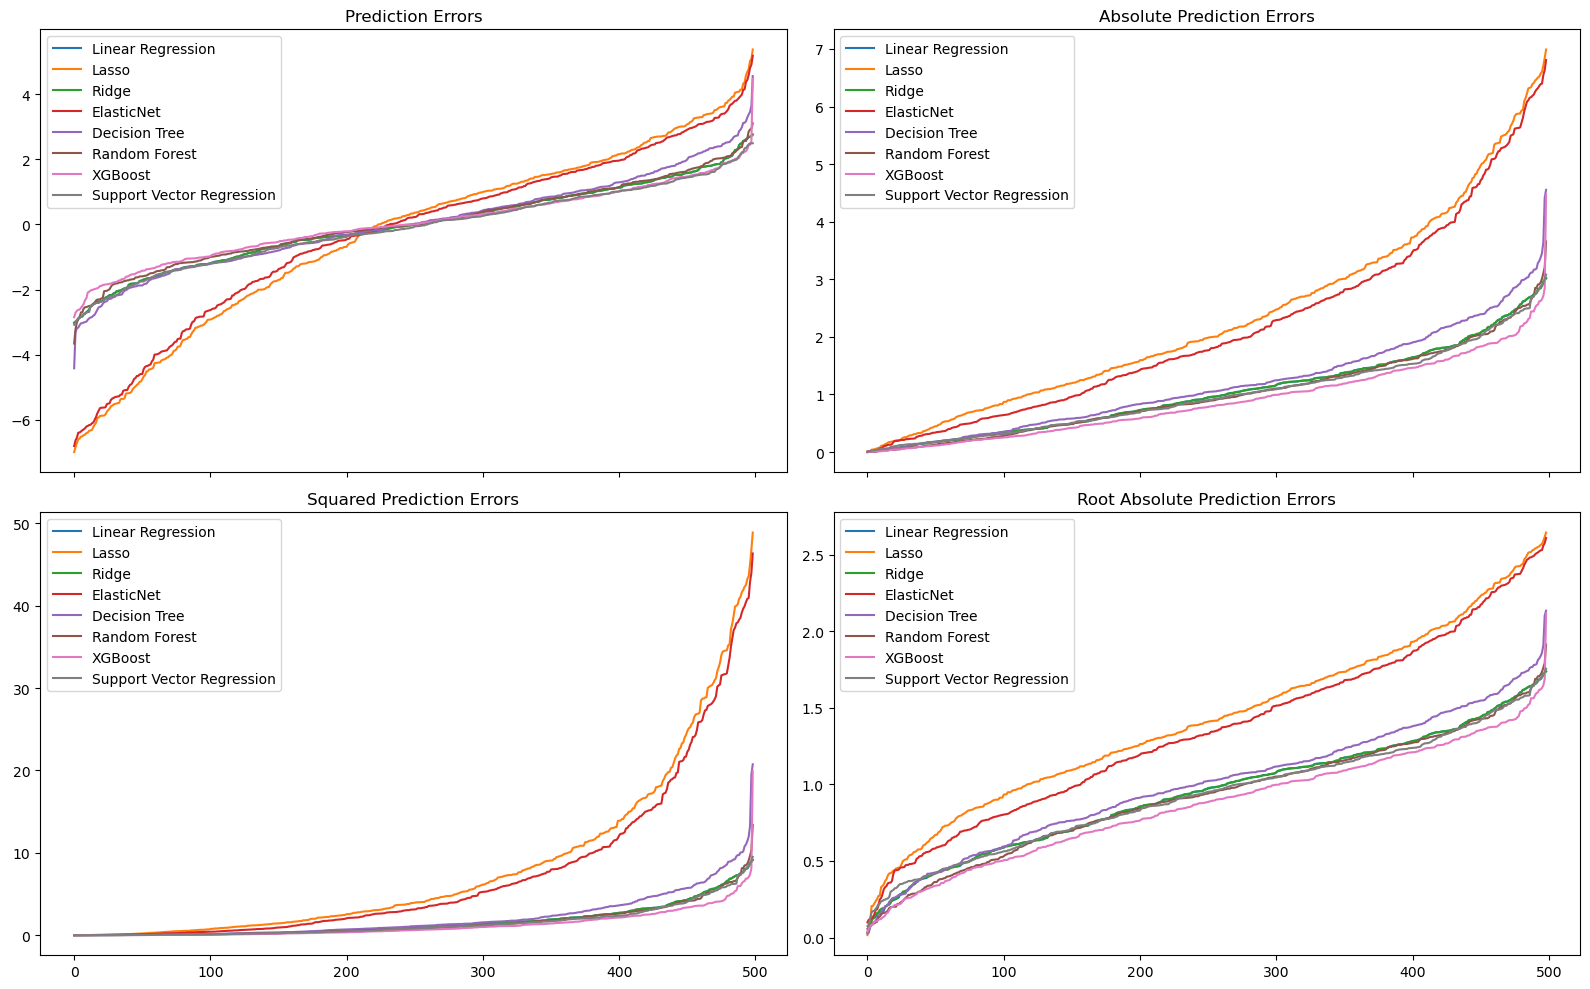

In [46]:
# Visualize the results as prediction errors and loss values for model 3. 
import xgboost as xgb
from xgboost import XGBRegressor

# load the data
data = df_selected

# split the data into features and target variable
X = data[['hh_inc_log','gnd']]
y = data['le_agg']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the prediction errors
    errors = y_test - y_pred

    # Calculate the R-squared, mean squared error, and root mean squared error
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"{name}")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}\n")

    # Visualize the prediction errors and loss values as curves
    axes[0, 0].plot(sorted(errors), label=name)
    axes[0, 0].set_title("Prediction Errors")
    axes[0, 0].legend()

    axes[0, 1].plot(sorted(np.abs(errors)), label=name)
    axes[0, 1].set_title("Absolute Prediction Errors")
    axes[0, 1].legend()

    axes[1, 0].plot(sorted(errors ** 2), label=name)
    axes[1, 0].set_title("Squared Prediction Errors")
    axes[1, 0].legend()

    axes[1, 1].plot(sorted(np.sqrt(np.abs(errors))), label=name)
    axes[1, 1].set_title("Root Absolute Prediction Errors")
    axes[1, 1].legend()
plt.tight_layout()
plt.show()


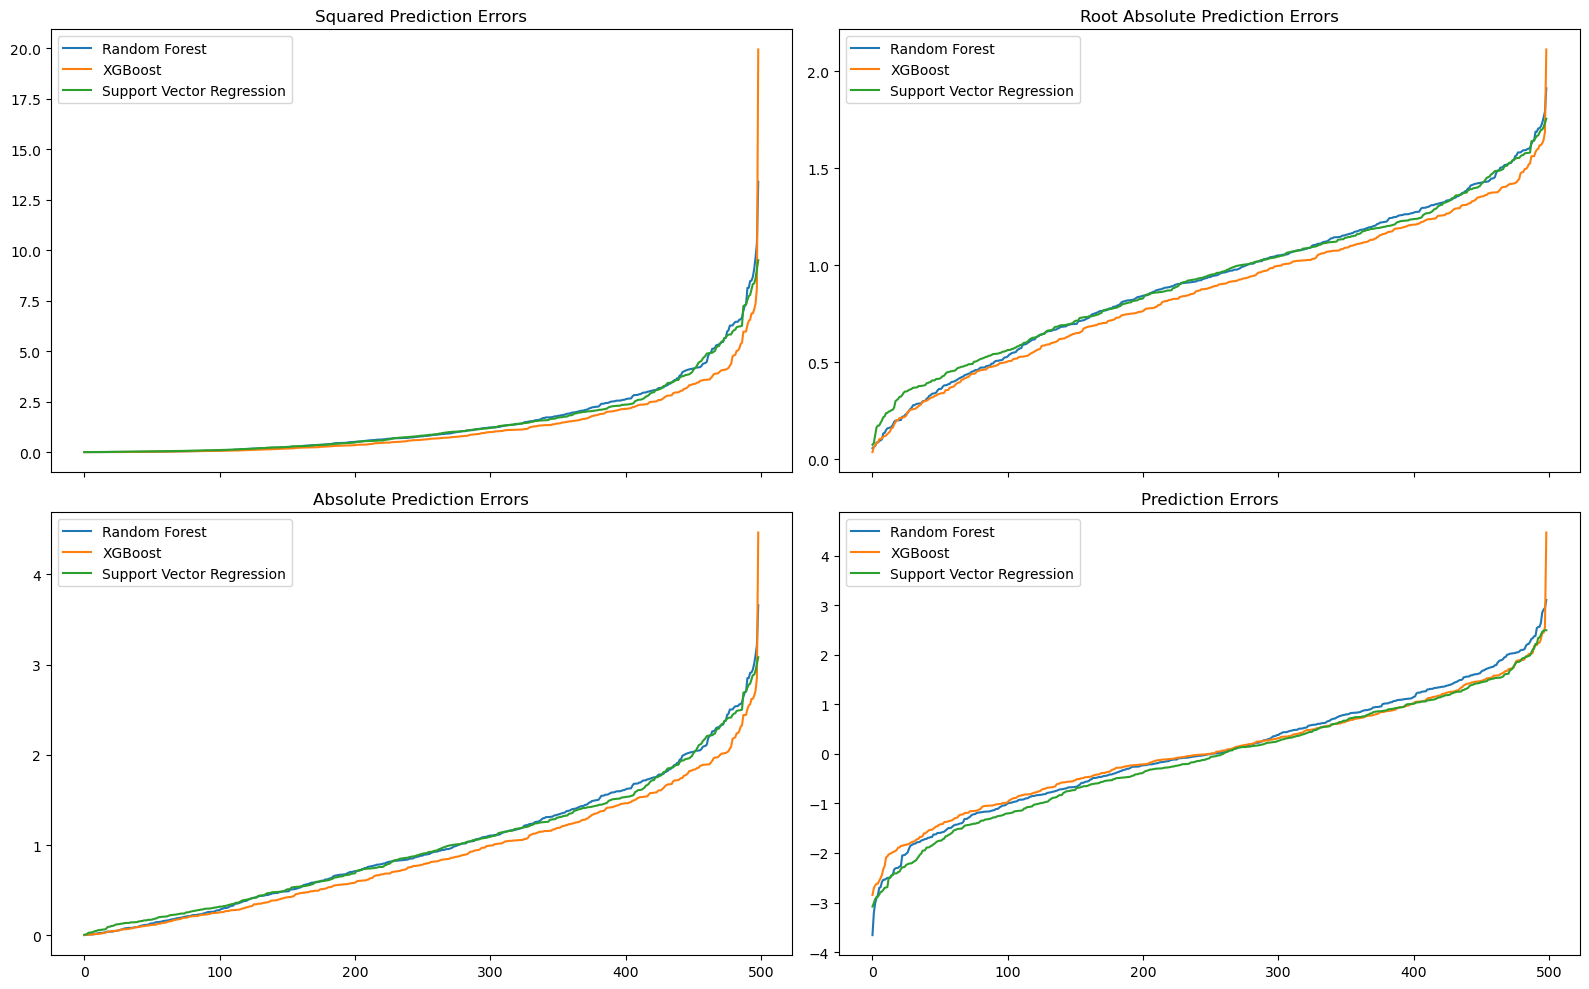

In [47]:
import xgboost as xgb
from xgboost import XGBRegressor

# load the data
data = df_selected

# split the data into features and target variable
X = data[['hh_inc_log','gnd']]
y = data['le_agg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "Support Vector Regression": SVR()
    # Add other models here if needed
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the prediction errors
    errors = y_test - y_pred

    # Calculate the squared prediction errors
    squared_errors = errors ** 2

    # Calculate the root absolute prediction errors
    root_absolute_errors = np.sqrt(np.abs(errors))

    # Calculate the absolute prediction errors
    absolute_errors = np.abs(errors)

    # Visualize the squared prediction errors
    axes[0, 0].plot(sorted(squared_errors), label=name)
    axes[0, 0].set_title("Squared Prediction Errors")
    axes[0, 0].legend()

    # Visualize the root absolute prediction errors
    axes[0, 1].plot(sorted(root_absolute_errors), label=name)
    axes[0, 1].set_title("Root Absolute Prediction Errors")
    axes[0, 1].legend()

    # Visualize the absolute prediction errors
    axes[1, 0].plot(sorted(absolute_errors), label=name)
    axes[1, 0].set_title("Absolute Prediction Errors")
    axes[1, 0].legend()

    # Visualize the prediction errors
    axes[1, 1].plot(sorted(errors), label=name)
    axes[1, 1].set_title("Prediction Errors")
    axes[1, 1].legend()


plt.tight_layout()
plt.show()


We chose Random Forest, XGBoost, and Support Vector Regression as the best models and rerun them on the training data. 

For each model, four plots are created to visualize the sorted prediction errors and their transformations. In the plot of Squared Prediction Errors, it can help identify models that have large errors. The plot of Root Absolute Prediction Errors can help identify models that have consistent errors, as taking the square root reduces the impact of large errors. As for the Absolute Prediction Errors, this plot provides a direct view of the magnitude of the errors without considering their direction (overprediction or underprediction). 

Lastly, Prediction Errors, this plot shows the raw prediction errors, including their direction. The model with a curve closer to zero or with a lower curve in these plots would generally be performing better.


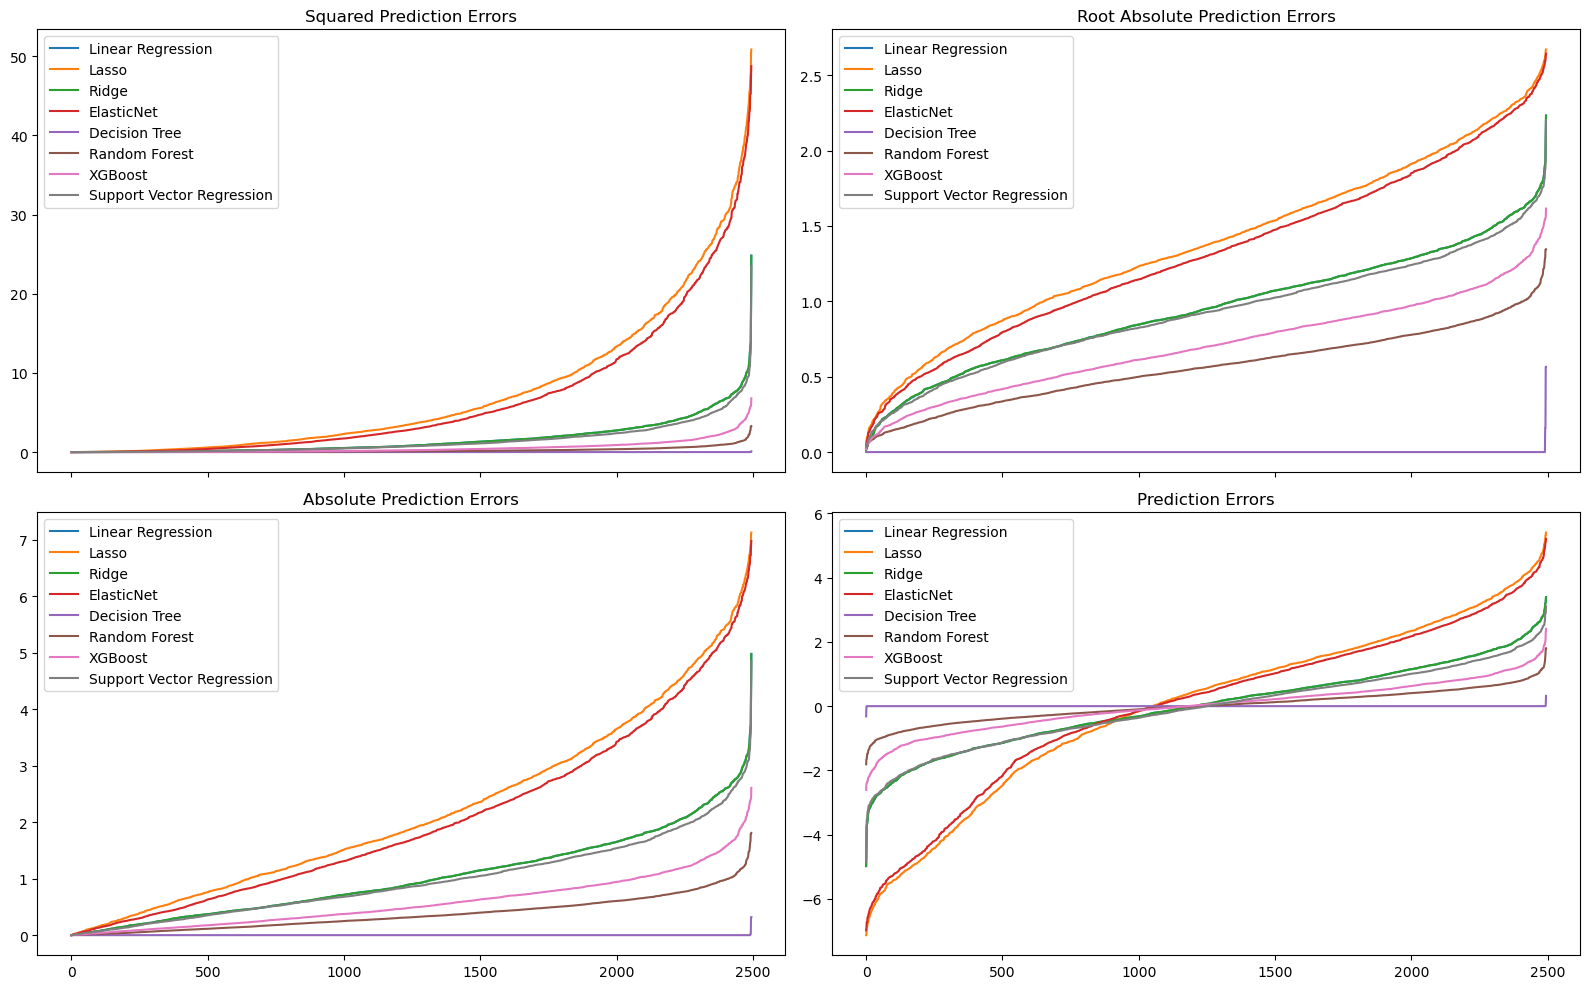

In [48]:
# load the data
data = df_selected

# split the data into features and target variable
X = data[['hh_inc_log','gnd']]
y = data['le_agg']

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    # Fit the model to the entire data
    model.fit(X, y)

    # Make predictions on the data
    y_pred = model.predict(X)

    # Calculate the prediction errors
    errors = y - y_pred

    # Calculate the squared prediction errors
    squared_errors = errors ** 2

    # Calculate the root absolute prediction errors
    root_absolute_errors = np.sqrt(np.abs(errors))

    # Calculate the absolute prediction errors
    absolute_errors = np.abs(errors)

    # Visualize the squared prediction errors
    axes[0, 0].plot(sorted(squared_errors), label=name)
    axes[0, 0].set_title("Squared Prediction Errors")
    axes[0, 0].legend()

    # Visualize the root absolute prediction errors
    axes[0, 1].plot(sorted(root_absolute_errors), label=name)
    axes[0, 1].set_title("Root Absolute Prediction Errors")
    axes[0, 1].legend()

    # Visualize the absolute prediction errors
    axes[1, 0].plot(sorted(absolute_errors), label=name)
    axes[1, 0].set_title("Absolute Prediction Errors")
    axes[1, 0].legend()

    # Visualize the prediction errors
    axes[1, 1].plot(sorted(errors), label=name)
    axes[1, 1].set_title("Prediction Errors")
    axes[1, 1].legend()

plt.tight_layout()
plt.show()


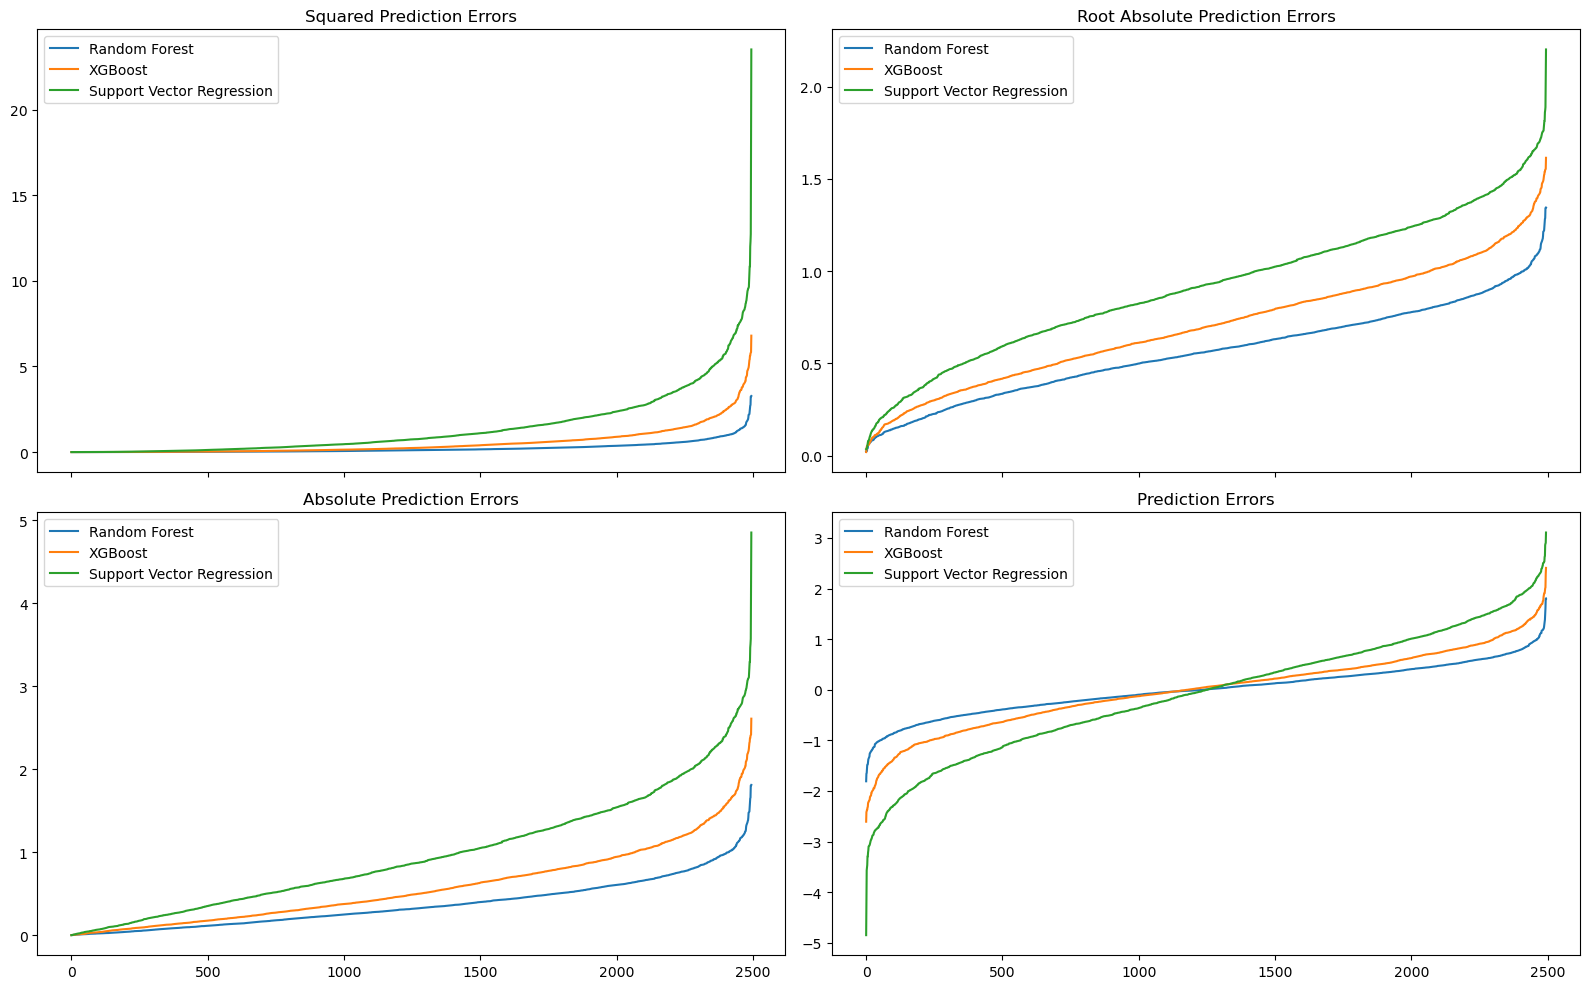

In [49]:
# Define the models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "Support Vector Regression": SVR()
    # Add other models here if needed
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    # Fit the model to the entire data
    model.fit(X, y)

    # Make predictions on the data
    y_pred = model.predict(X)

    # Calculate the prediction errors
    errors = y - y_pred

    # Calculate the squared prediction errors
    squared_errors = errors ** 2

    # Calculate the root absolute prediction errors
    root_absolute_errors = np.sqrt(np.abs(errors))

    # Calculate the absolute prediction errors
    absolute_errors = np.abs(errors)

    # Visualize the squared prediction errors
    axes[0, 0].plot(sorted(squared_errors), label=name)
    axes[0, 0].set_title("Squared Prediction Errors")
    axes[0, 0].legend()

    # Visualize the root absolute prediction errors
    axes[0, 1].plot(sorted(root_absolute_errors), label=name)
    axes[0, 1].set_title("Root Absolute Prediction Errors")
    axes[0, 1].legend()

    # Visualize the absolute prediction errors
    axes[1, 0].plot(sorted(absolute_errors), label=name)
    axes[1, 0].set_title("Absolute Prediction Errors")
    axes[1, 0].legend()

    # Visualize the prediction errors
    axes[1, 1].plot(sorted(errors), label=name)
    axes[1, 1].set_title("Prediction Errors")
    axes[1, 1].legend()

plt.tight_layout()
plt.show()


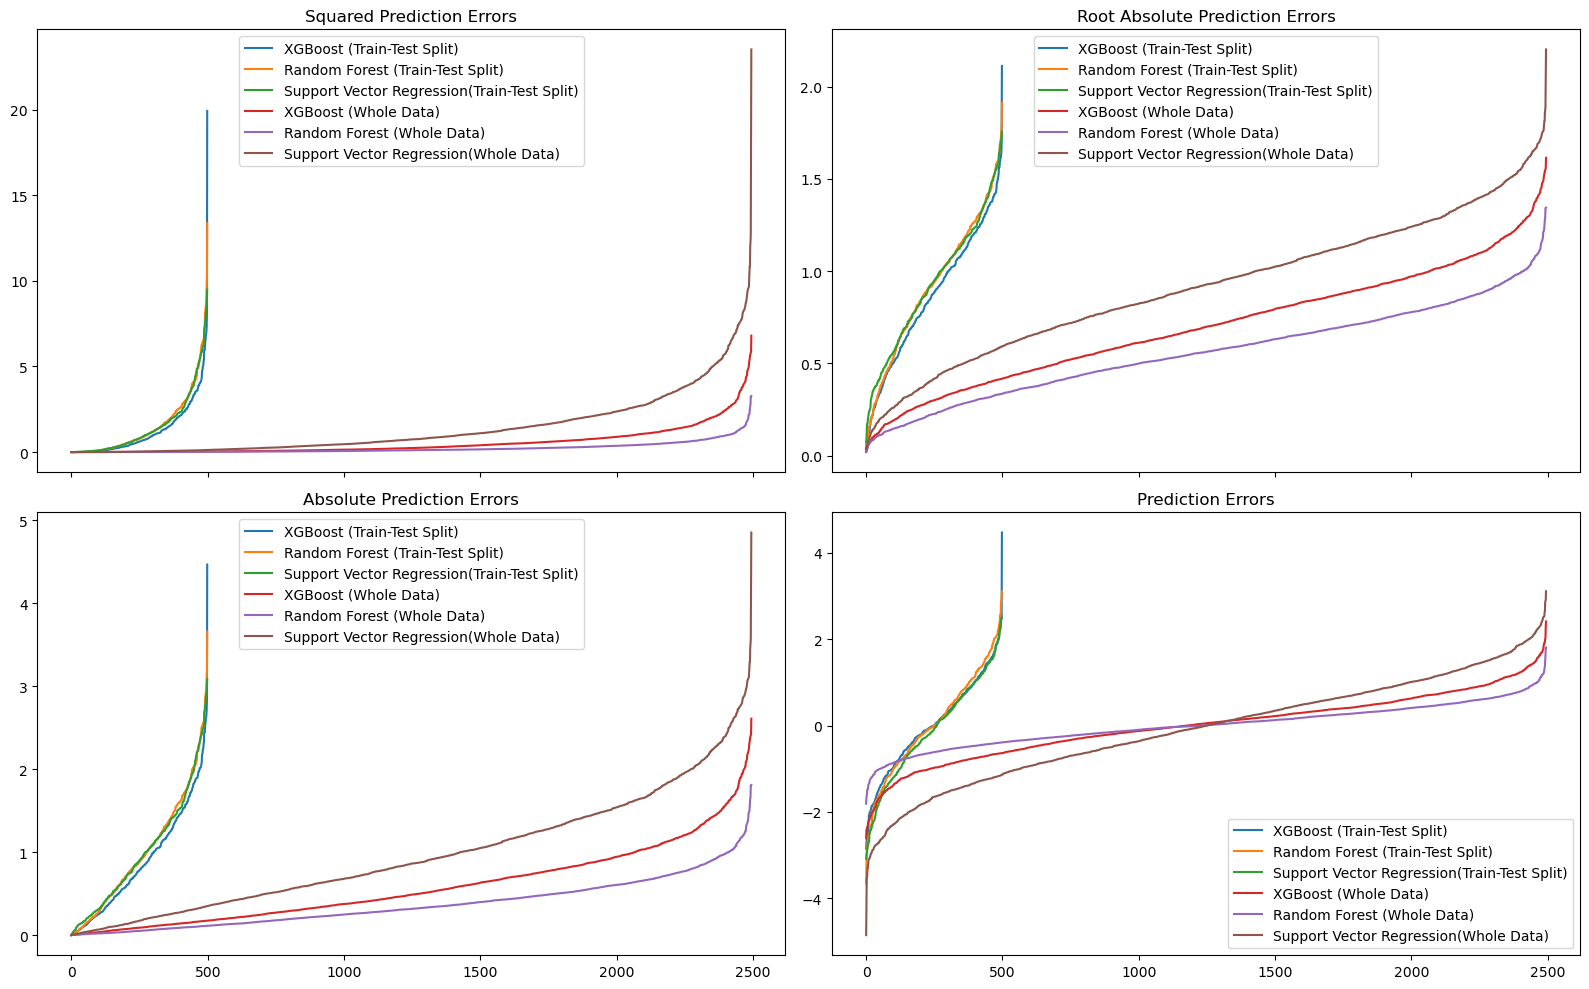

In [50]:
import xgboost as xgb
from xgboost import XGBRegressor

# load the data
data = df_selected

# split the data into features and target variable
X = data[['hh_inc_log','gnd']]
y = data['le_agg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "XGBoost (Train-Test Split)": xgb.XGBRegressor(random_state=42),
    "Random Forest (Train-Test Split)": RandomForestRegressor(random_state=42),
    "Support Vector Regression(Train-Test Split)": SVR(),
    "XGBoost (Whole Data)": xgb.XGBRegressor(random_state=42),
    "Random Forest (Whole Data)": RandomForestRegressor(random_state=42), 
    "Support Vector Regression(Whole Data)": SVR(),
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    if "Train-Test Split" in name:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the prediction errors
        errors = y_test - y_pred
    else:
        # Fit the model to the entire data
        model.fit(X, y)

        # Make predictions on the data
        y_pred = model.predict(X)

        # Calculate the prediction errors
        errors = y - y_pred

    # Calculate the squared prediction errors
    squared_errors = errors ** 2

    # Calculate the root absolute prediction errors
    root_absolute_errors = np.sqrt(np.abs(errors))

    # Calculate the absolute prediction errors
    absolute_errors = np.abs(errors)

    # Visualize the squared prediction errors
    axes[0, 0].plot(sorted(squared_errors), label=name)
    axes[0, 0].set_title("Squared Prediction Errors")
    axes[0, 0].legend()

    # Visualize the root absolute prediction errors
    axes[0, 1].plot(sorted(root_absolute_errors), label=name)
    axes[0, 1].set_title("Root Absolute Prediction Errors")
    axes[0, 1].legend()

    # Visualize the absolute prediction errors
    axes[1, 0].plot(sorted(absolute_errors), label=name)
    axes[1, 0].set_title("Absolute Prediction Errors")
    axes[1, 0].legend()

    # Visualize the prediction errors
    axes[1, 1].plot(sorted(errors), label=name)
    axes[1, 1].set_title("Prediction Errors")
    axes[1, 1].legend()

plt.tight_layout()
plt.show()


In this part, for each model, four plots are created to visualize the sorted prediction errors and their transformations: squared prediction errors, root absolute prediction errors, absolute prediction errors, and prediction errors. 

Each plot includes data from all eight models, allowing for a comparison of their performance. Random Forest has lower curves in these plots, so it would generally be performing better.

In [51]:
import xgboost as xgb
from xgboost import XGBRegressor

# load the data
data = df_selected

# split the data into features and target variable
X = data[['hh_inc_log','gnd']]
y = data['le_agg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "XGBoost (Train-Test Split)": xgb.XGBRegressor(random_state=42),
    "Random Forest (Train-Test Split)": RandomForestRegressor(random_state=42),
    "Support Vector Regression(Train-Test Split)": SVR(),
    "XGBoost (Whole Data)": xgb.XGBRegressor(random_state=42),
    "Random Forest (Whole Data)": RandomForestRegressor(random_state=42), 
    "Support Vector Regression(Whole Data)": SVR(),
}

results = {}

for name, model in models.items():
    if "Train-Test Split" in name:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the R-squared, mean squared error, and root mean squared error
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        results[name] = {'R-squared': r2, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}
    else:
        # Fit the model to the entire data
        model.fit(X, y)

        # Make predictions on the data
        y_pred = model.predict(X)

        # Calculate the R-squared, mean squared error, and root mean squared error
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)

        results[name] = {'R-squared': r2, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}

# Print the results as a table
print("Results for Train-Test Split:")
print("{:<30} {:<15} {:<20} {:<25}".format("Model", "R-squared", "Mean Squared Error", "Root Mean Squared Error"))
for name, metrics in results.items():
    if "Train-Test Split" in name:
        print("{:<30} {:<15.4f} {:<20.4f} {:<25.4f}".format(name, metrics['R-squared'], metrics['Mean Squared Error'], metrics['Root Mean Squared Error']))

print("\nResults for Whole Data:")
print("{:<30} {:<15} {:<20} {:<25}".format("Model", "R-squared", "Mean Squared Error", "Root Mean Squared Error"))
for name, metrics in results.items():
    if "Train-Test Split" not in name:
        print("{:<30} {:<15.4f} {:<20.4f} {:<25.4f}".format(name, metrics['R-squared'], metrics['Mean Squared Error'], metrics['Root Mean Squared Error']))


Results for Train-Test Split:
Model                          R-squared       Mean Squared Error   Root Mean Squared Error  
XGBoost (Train-Test Split)     0.8950          1.2136               1.1016                   
Random Forest (Train-Test Split) 0.8684          1.5217               1.2336                   
Support Vector Regression(Train-Test Split) 0.8730          1.4684               1.2118                   

Results for Whole Data:
Model                          R-squared       Mean Squared Error   Root Mean Squared Error  
XGBoost (Whole Data)           0.9494          0.5519               0.7429                   
Random Forest (Whole Data)     0.9794          0.2242               0.4735                   
Support Vector Regression(Whole Data) 0.8686          1.4317               1.1965                   


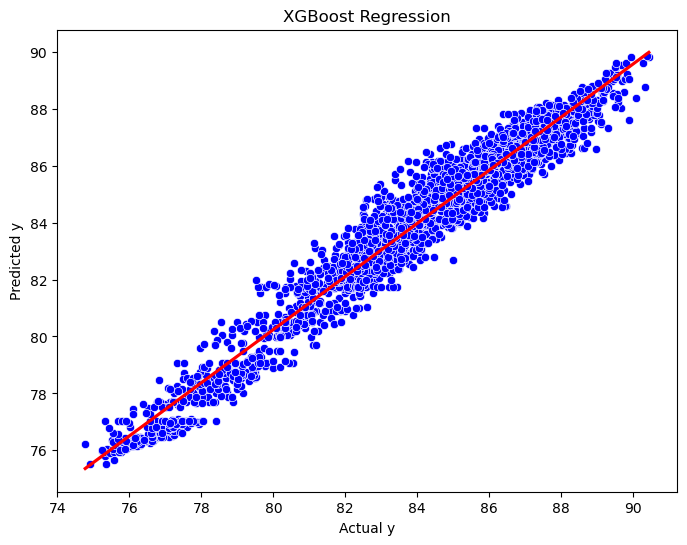

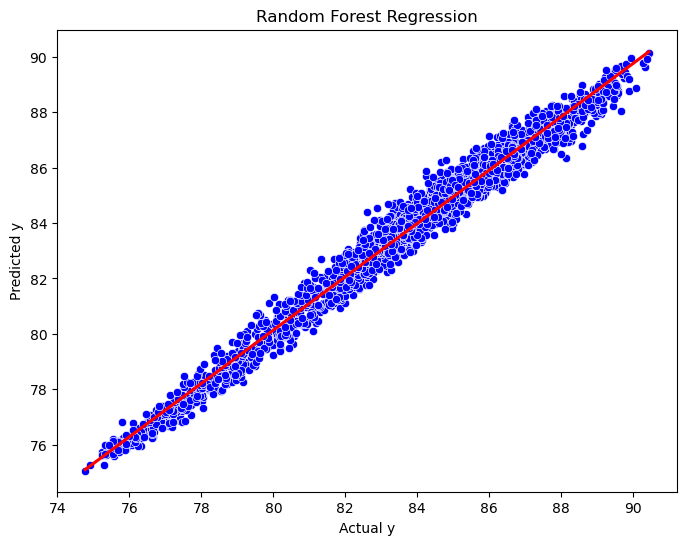

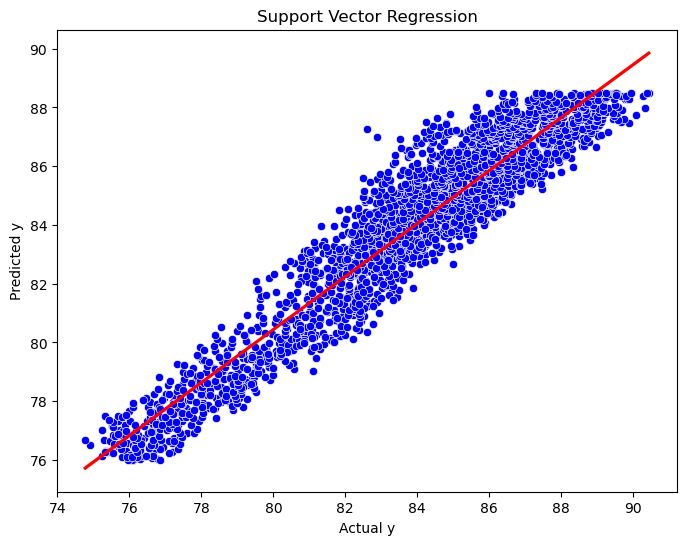

In [52]:
from xgboost import XGBRegressor

# load the data
data = df_selected

# split the data into features and target variable
X = data[['hh_inc_scaled','gnd']]
y = data['le_agg']

# Instantiate the Ridge model
xgboost_model = xgb.XGBRegressor(random_state=42)

# Fit the Ridge model to the entire data
xgboost_model.fit(X, y)

# Make predictions on the entire data for Ridge
y_pred_xgboost = xgboost_model.predict(X)

# Instantiate the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the Random Forest model to the entire data
rf_model.fit(X, y)

# Make predictions on the entire data for Random Forest
y_pred_rf = rf_model.predict(X)

# Instantiate the SVR model
svm_model = SVR()

# Fit the SVR model to the entire data
svm_model.fit(X, y)

# Make predictions on the entire data for SVM
y_pred_svm = svm_model.predict(X)

# Create a DataFrame to hold the actual y values, predicted values, and errors for XGBoost
results_df_xgb = pd.DataFrame({'Actual': y, 'Predicted': y_pred_xgboost, 'Errors': y - y_pred_xgboost})

# Create a DataFrame to hold the actual y values, predicted values, and errors for Random Forest
results_df_rf = pd.DataFrame({'Actual': y, 'Predicted': y_pred_rf, 'Errors': y - y_pred_rf})

# Create a DataFrame to hold the actual y values, predicted values, and errors for SVM
results_df_svm = pd.DataFrame({'Actual': y, 'Predicted': y_pred_svm, 'Errors': y - y_pred_svm})

# Plot the actual y values against the predicted values for Ridge
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_xgb, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_xgb, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("XGBoost Regression")

# Show the plot for SVM
plt.show()

# Plot the actual y values against the predicted values for Random Forest
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_rf, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_rf, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Random Forest Regression")

# Show the plot for Random Forest
plt.show()

# Plot the actual y values against the predicted values for SVM
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_svm, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_svm, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Support Vector Regression")

# Show the plot for SVM
plt.show()



To see how well each model is predicting the target variable, we create scatter plots for each model where the x-axis represents the actual y values and the y-axis represents the predicted y values. If the model's predictions are perfect, all points would fall on this line. Here we can see the strong performance of our top three models when compared to actual values.

In [53]:
# Calculate the mean squared error (MSE)
mse = [lr_mse, lasso_mse, ridge_mse, en_mse, dt_mse, rf_mse, xgb_mse, svr_mse]

# Calculate the average MSE
average_mse = np.mean(mse)

# Calculate the bias
bias = np.mean((lr_pred - y_test) ** 2)

# Calculate the variance
variance = np.var(lr_pred)

# Calculate the total error
total_error = bias + variance

# Print the bias and variance
print("Bias: ", bias)
print("Variance: ", variance)
print("Total Error: ", total_error)

Bias:  2.1358809877444376
Variance:  7.958635591995243
Total Error:  10.09451657973968


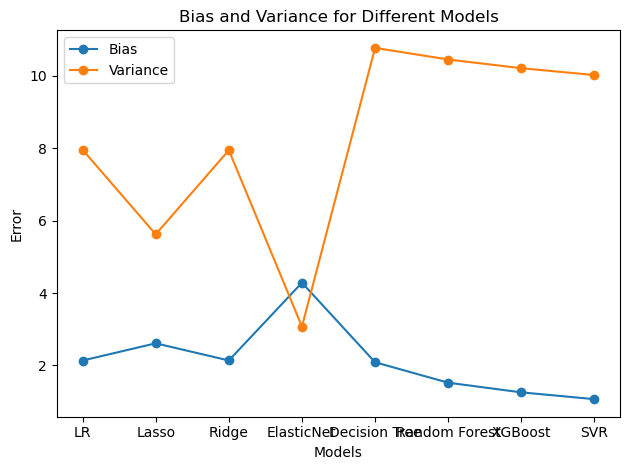

In [54]:
import matplotlib.pyplot as plt

# Calculate the bias and variance for each model
bias_values = [np.mean((y_pred - y_test) ** 2) for y_pred in [lr_pred, lasso_pred, ridge_pred, en_pred, dt_pred, rf_pred, xgb_pred, svr_pred]]
variance_values = [np.var(y_pred) for y_pred in [lr_pred, lasso_pred, ridge_pred, en_pred, dt_pred, rf_pred, xgb_pred, svr_pred]]

# Create a line plot
models = ['LR', 'Lasso', 'Ridge', 'ElasticNet', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVR']
x = np.arange(len(models))

fig, ax = plt.subplots()
ax.plot(x, bias_values, marker='o', label='Bias')
ax.plot(x, variance_values, marker='o', label='Variance')

ax.set_xlabel('Models')
ax.set_ylabel('Error')
ax.set_title('Bias and Variance for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


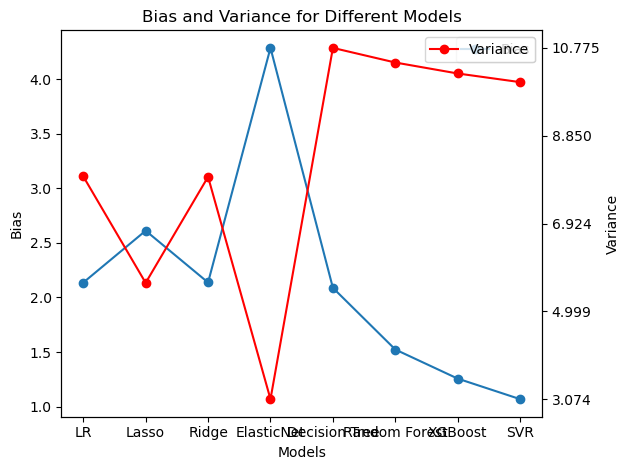

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the bias and variance for each model
bias_values = [np.mean((y_pred - y_test) ** 2) for y_pred in [lr_pred, lasso_pred, ridge_pred, en_pred, dt_pred, rf_pred, xgb_pred, svr_pred]]
variance_values = [np.var(y_pred) for y_pred in [lr_pred, lasso_pred, ridge_pred, en_pred, dt_pred, rf_pred, xgb_pred, svr_pred]]

# Create a line plot
models = ['LR', 'Lasso', 'Ridge', 'ElasticNet', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVR']
x = np.arange(len(models))

fig, ax = plt.subplots()
ax.plot(x, bias_values, marker='o', label='Bias')
ax.set_xlabel('Models')
ax.set_ylabel('Bias')
ax.set_title('Bias and Variance for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Create a second y-axis
ax2 = ax.twinx()
ax2.plot(x, variance_values, marker='o', color='r', label='Variance')
ax2.set_ylabel('Variance')

# Adjust the scale of the second y-axis
ax2_ticks = np.linspace(min(variance_values), max(variance_values), num=5)
ax2.set_yticks(ax2_ticks)

ax2.legend()

plt.tight_layout()
plt.show()


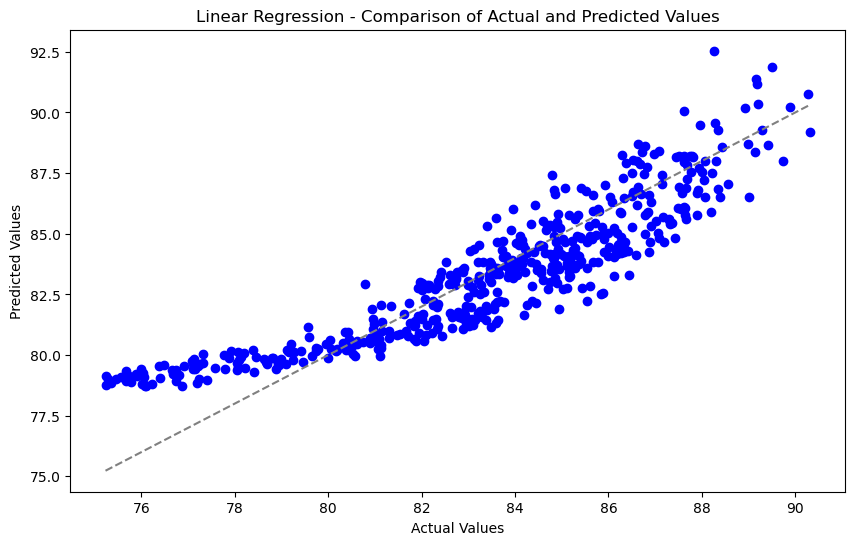

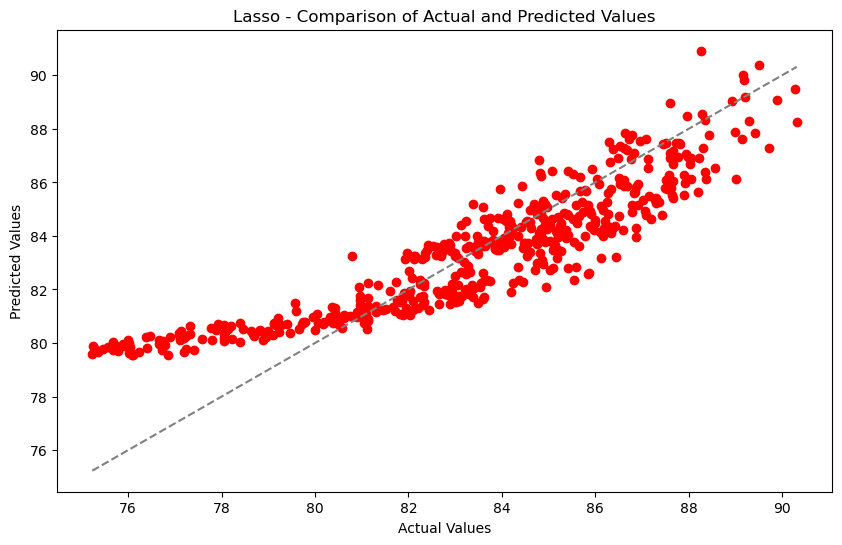

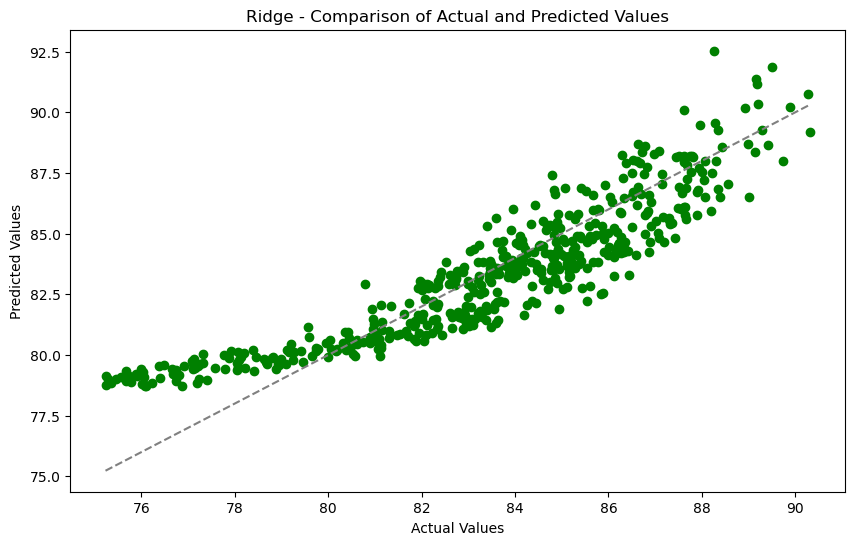

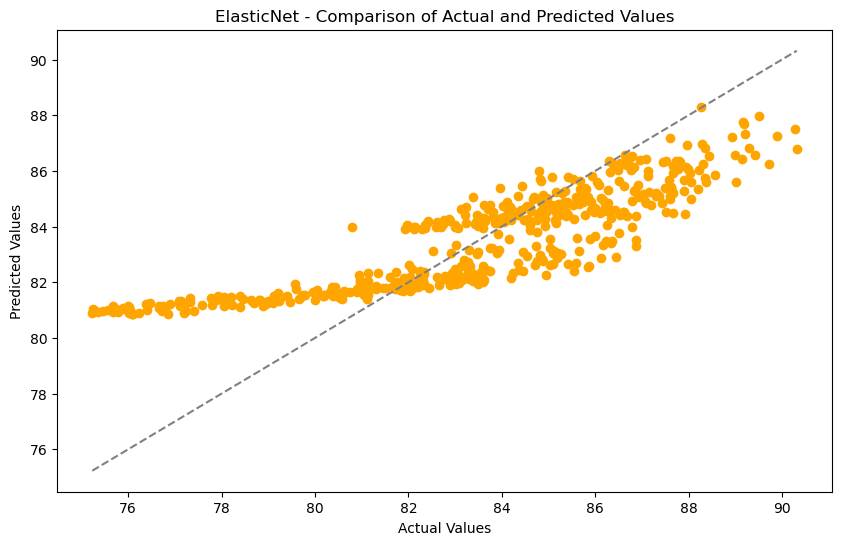

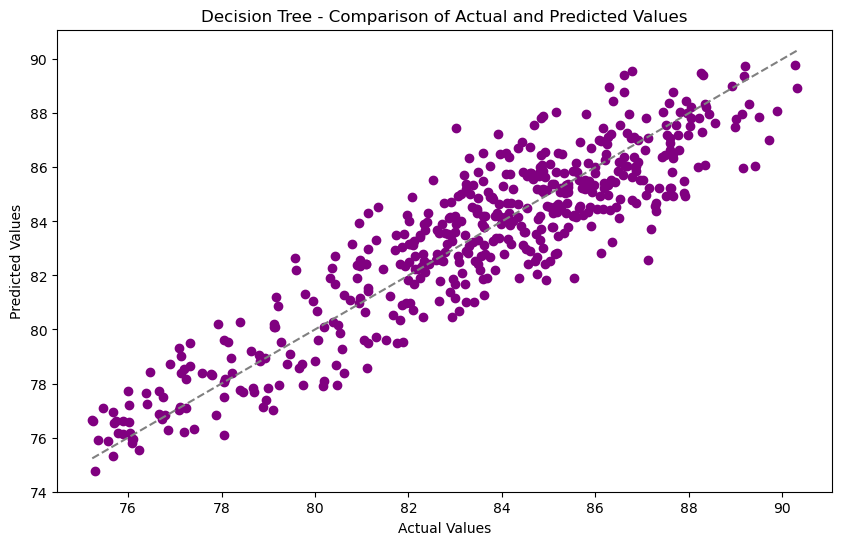

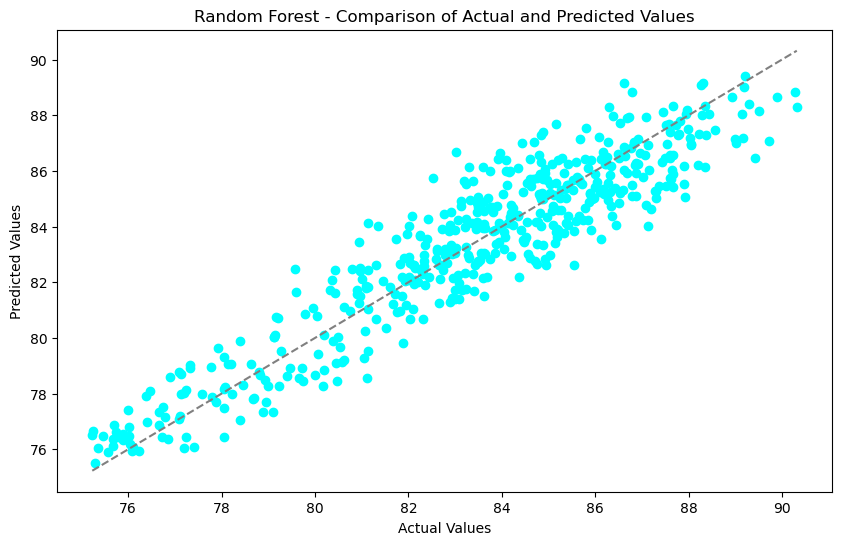

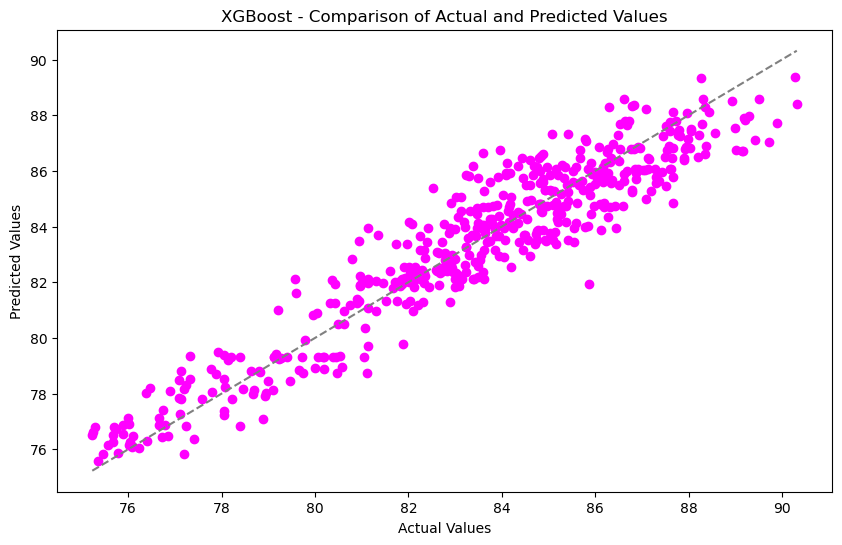

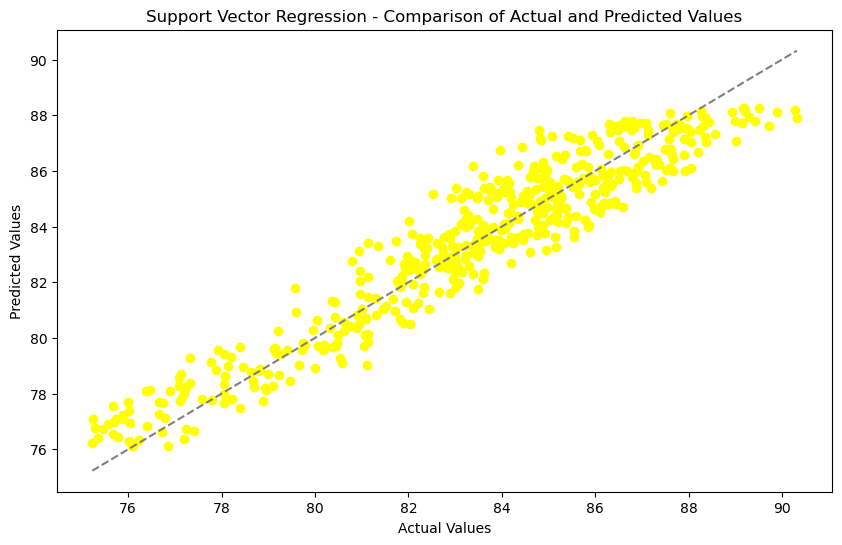

In [56]:
import matplotlib.pyplot as plt

# Create scatter plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression - Comparison of Actual and Predicted Values')
plt.show()

# Create scatter plot for Lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_pred, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso - Comparison of Actual and Predicted Values')
plt.show()

# Create scatter plot for Ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge - Comparison of Actual and Predicted Values')
plt.show()

# Create scatter plot for ElasticNet
plt.figure(figsize=(10, 6))
plt.scatter(y_test, en_pred, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('ElasticNet - Comparison of Actual and Predicted Values')
plt.show()

# Create scatter plot for Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_pred, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree - Comparison of Actual and Predicted Values')
plt.show()

# Create scatter plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, color='cyan')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest - Comparison of Actual and Predicted Values')
plt.show()

# Create scatter plot for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred, color='magenta')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost - Comparison of Actual and Predicted Values')
plt.show()

# Create scatter plot for Support Vector Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_pred, color='yellow')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Support Vector Regression - Comparison of Actual and Predicted Values')
plt.show()


In [57]:
import pandas as pd
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# load the data
data = df_selected

# split the data into features and target variable
X = data[['hh_inc_log','gnd']]
y = data['le_agg']

# Define the alpha/lambda values
alphas = [0.1, 1.0, 3.0, 5.0, 10.0]

# Define the number of folds
n_folds = 10

# Initialize lists to store the results
results = []

# Perform k-fold cross-validation
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

for alpha in alphas:
    # Perform Lasso regression
    lasso_cv = LassoCV(alphas=[alpha], cv=kf)
    lasso_cv.fit(X_train, y_train)
    lasso_train_pred = lasso_cv.predict(X_train)
    lasso_test_pred = lasso_cv.predict(X_test)
    lasso_train_r2 = r2_score(y_train, lasso_train_pred)
    lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
    lasso_train_rmse = np.sqrt(lasso_train_mse)
    lasso_test_r2 = r2_score(y_test, lasso_test_pred)
    lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)
    lasso_test_rmse = np.sqrt(lasso_test_mse)
    results.append(['Lasso', alpha, lasso_train_r2, lasso_train_mse, lasso_train_rmse, lasso_test_r2, lasso_test_mse, lasso_test_rmse])

    # Perform Ridge regression
    ridge_cv = RidgeCV(alphas=[alpha], cv=kf)
    ridge_cv.fit(X_train, y_train)
    ridge_train_pred = ridge_cv.predict(X_train)
    ridge_test_pred = ridge_cv.predict(X_test)
    ridge_train_r2 = r2_score(y_train, ridge_train_pred)
    ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
    ridge_train_rmse = np.sqrt(ridge_train_mse)
    ridge_test_r2 = r2_score(y_test, ridge_test_pred)
    ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
    ridge_test_rmse = np.sqrt(ridge_test_mse)
    results.append(['Ridge', alpha, ridge_train_r2, ridge_train_mse, ridge_train_rmse, ridge_test_r2, ridge_test_mse, ridge_test_rmse])

    # Perform Elastic Net regression
    elastic_net_cv = ElasticNetCV(alphas=[alpha], cv=kf)
    elastic_net_cv.fit(X_train, y_train)
    elastic_net_train_pred = elastic_net_cv.predict(X_train)
    elastic_net_test_pred = elastic_net_cv.predict(X_test)
    elastic_net_train_r2 = r2_score(y_train, elastic_net_train_pred)
    elastic_net_train_mse = mean_squared_error(y_train, elastic_net_train_pred)
    elastic_net_train_rmse = np.sqrt(elastic_net_train_mse)
    elastic_net_test_r2 = r2_score(y_test, elastic_net_test_pred)
    elastic_net_test_mse = mean_squared_error(y_test, elastic_net_test_pred)
    elastic_net_test_rmse = np.sqrt(elastic_net_test_mse)
    results.append(['ElasticNet', alpha, elastic_net_train_r2, elastic_net_train_mse, elastic_net_train_rmse, elastic_net_test_r2, elastic_net_test_mse, elastic_net_test_rmse])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Alpha', 'Train R-squared', 'Train MSE', 'Train RMSE', 'Test R-squared', 'Test MSE', 'Test RMSE'])

# Print the results table
results_df


Model  Alpha  Train R-squared  Train MSE  Train RMSE  Test R-squared  \
0        Lasso    0.1         0.840993   1.702070    1.304634        0.850542   
1        Ridge    0.1         0.846622   1.641817    1.281334        0.863126   
2   ElasticNet    0.1         0.823964   1.884352    1.372717        0.827289   
3        Lasso    1.0         0.315884   7.323020    2.706108        0.291792   
4        Ridge    1.0         0.846620   1.641838    1.281342        0.863007   
5   ElasticNet    1.0         0.395519   6.470577    2.543733        0.373719   
6        Lasso    3.0         0.000000  10.704353    3.271751       -0.012231   
7        Ridge    3.0         0.846604   1.642004    1.281407        0.862731   
8   ElasticNet    3.0         0.032041  10.361378    3.218909        0.017917   
9        Lasso    5.0         0.000000  10.704353    3.271751       -0.012231   
10       Ridge    5.0         0.846573   1.642332    1.281535        0.862443   
11  ElasticNet    5.0         0.000000  10.704353    3.271751       -0.012231   
12       Lasso   10.0         0.000000  10.704353    3.271751       -0.012231   
13       Ridge   10.0         0.846433   1.643841    1.282123        0.861669   
14  ElasticNet   10.0         0.000000  10.704353    3.271751       -0.012231   

     Test MSE  Test RMSE  
0    1.727803   1.314459  
1    1.582319   1.257903  
2    1.996619   1.413018  
3    8.187193   2.861327  
4    1.583704   1.258453  
5    7.240084   2.690740  
6   11.701831   3.420794  
7    1.586888   1.259717  
8   11.353305   3.369467  
9   11.701831   3.420794  
10   1.590219   1.261039  
11  11.701831   3.420794  
12  11.701831   3.420794  
13   1.599165   1.264581  
14  11.701831   3.420794

In [58]:
# Now using performance results, we will calculates the average performance metrics for each model type across different alpha values, allowing us to compare the performance of different models. Note that the best model can be determined based on our chosen performance metric(s) and criteria.
# Group the results by model type (Lasso, Ridge, ElasticNet)
grouped_results = results_df.groupby('Model')

# Calculate the average performance metrics for each model type
average_results = grouped_results.mean()

# Display the average results
average_results

Alpha  Train R-squared  Train MSE  Train RMSE  Test R-squared  \
Model                                                                       
ElasticNet   3.82         0.250305   8.025003    2.735772        0.238892   
Lasso        3.82         0.231375   8.227630    2.765199        0.221128   
Ridge        3.82         0.846570   1.642366    1.281548        0.862595   

            Test MSE  Test RMSE  
Model                            
ElasticNet  8.798734   2.862963  
Lasso       9.004098   2.887634  
Ridge       1.588459   1.260339

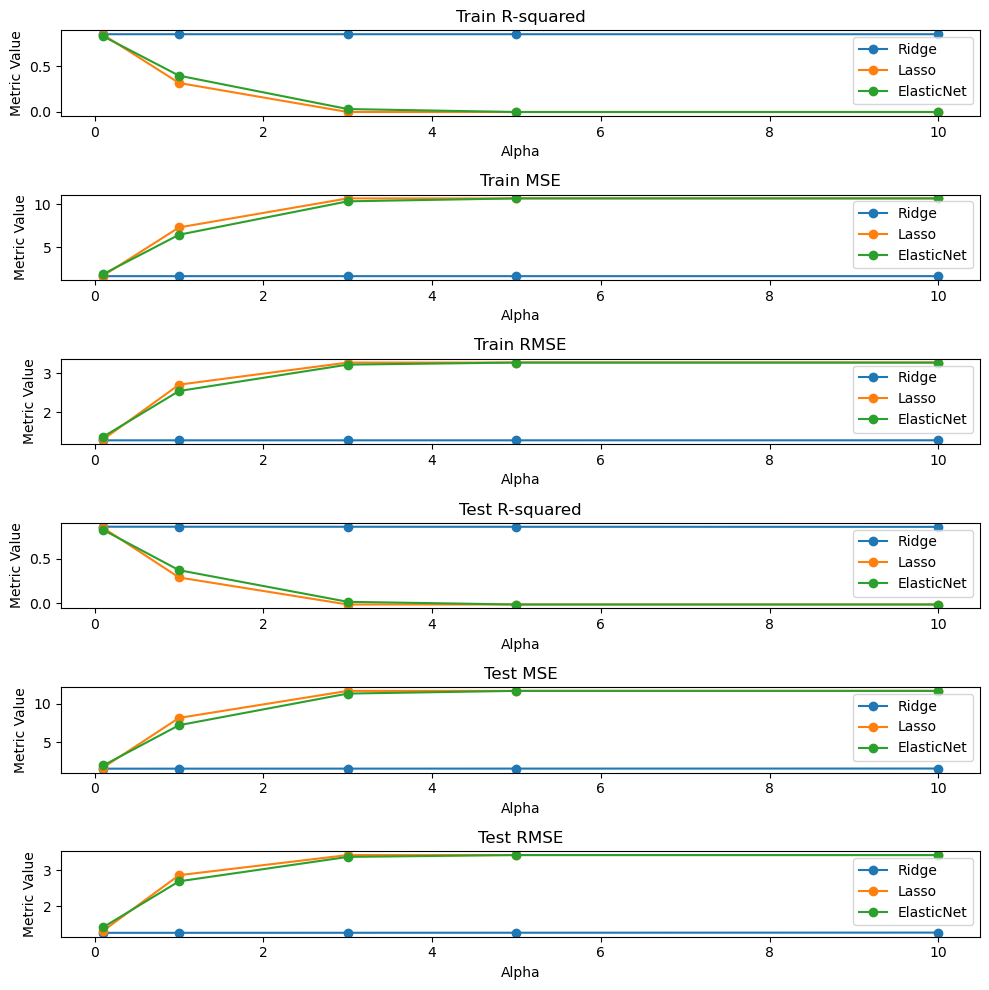

In [59]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Alpha', 'Train R-squared', 'Train MSE', 'Train RMSE', 'Test R-squared', 'Test MSE', 'Test RMSE'])

# Filter the results for Ridge, Lasso, and ElasticNet
ridge_results = results_df[results_df['Model'] == 'Ridge']
lasso_results = results_df[results_df['Model'] == 'Lasso']
elasticnet_results = results_df[results_df['Model'] == 'ElasticNet']

# Define the alphas
alphas = results_df['Alpha'].unique()

# Define the metrics columns
metrics_columns = ['Train R-squared', 'Train MSE', 'Train RMSE', 'Test R-squared', 'Test MSE', 'Test RMSE']

# Create a figure with subplots for each metric
fig, axs = plt.subplots(len(metrics_columns), figsize=(10, 10))

# Iterate over the metrics columns
for i, metric in enumerate(metrics_columns):
    # Plot the metric values for Ridge
    axs[i].plot(alphas, ridge_results[metric], marker='o', label='Ridge')
    
    # Plot the metric values for Lasso
    axs[i].plot(alphas, lasso_results[metric], marker='o', label='Lasso')
    
    # Plot the metric values for ElasticNet
    axs[i].plot(alphas, elasticnet_results[metric], marker='o', label='ElasticNet')
    
    # Set the title and labels for each subplot
    axs[i].set_title(metric)
    axs[i].set_xlabel('Alpha')
    axs[i].set_ylabel('Metric Value')
    
    # Add a legend to each subplot
    axs[i].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


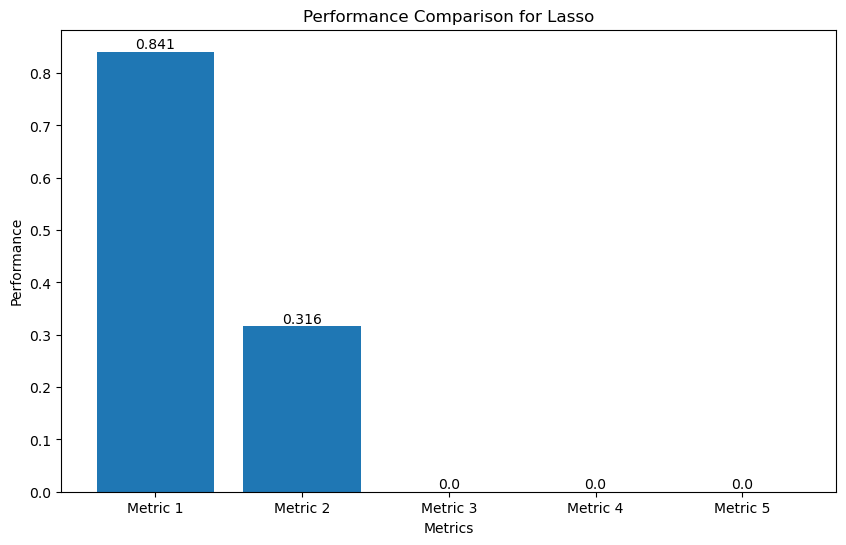

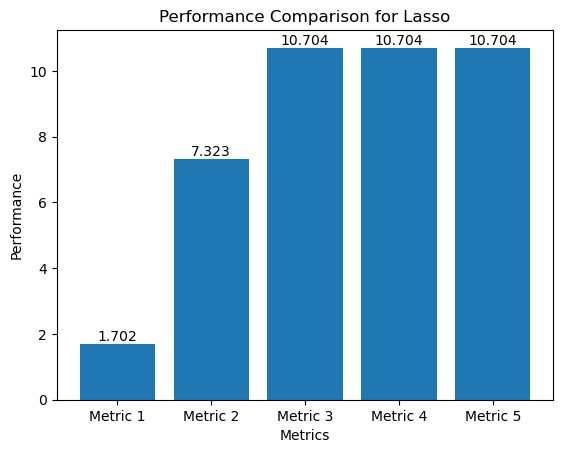

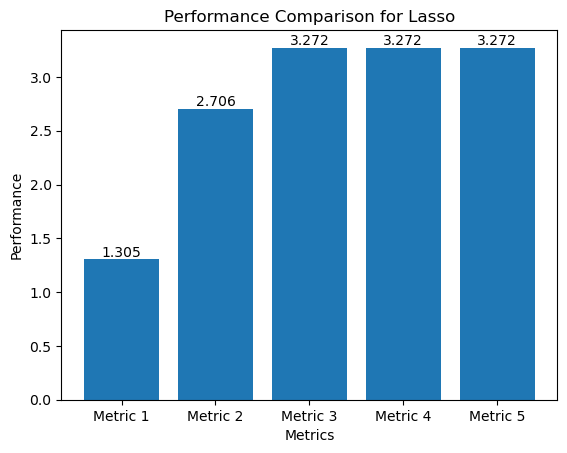

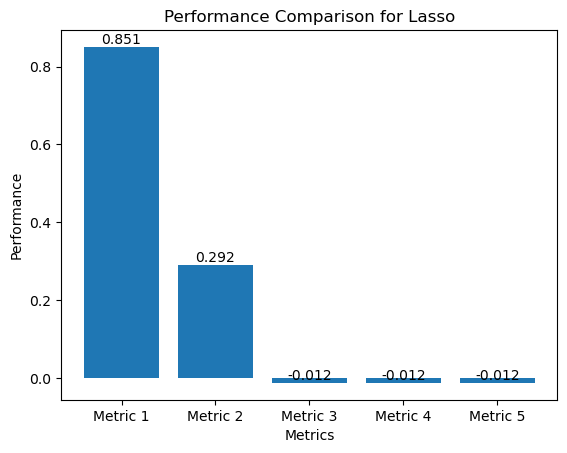

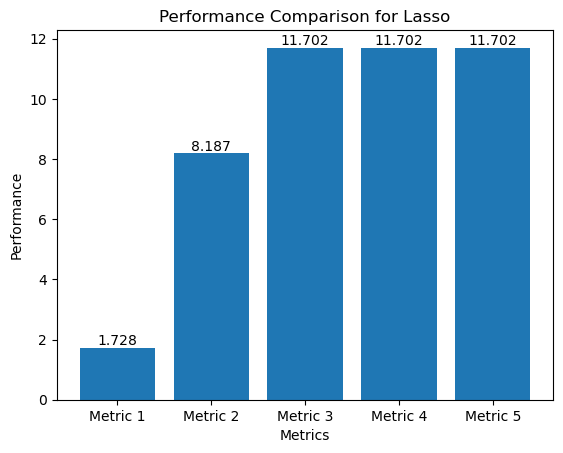

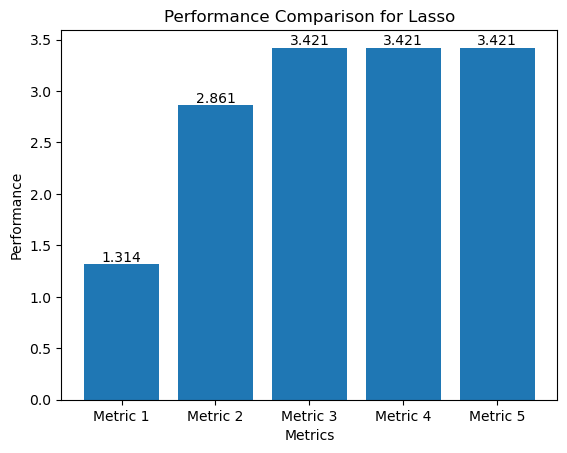

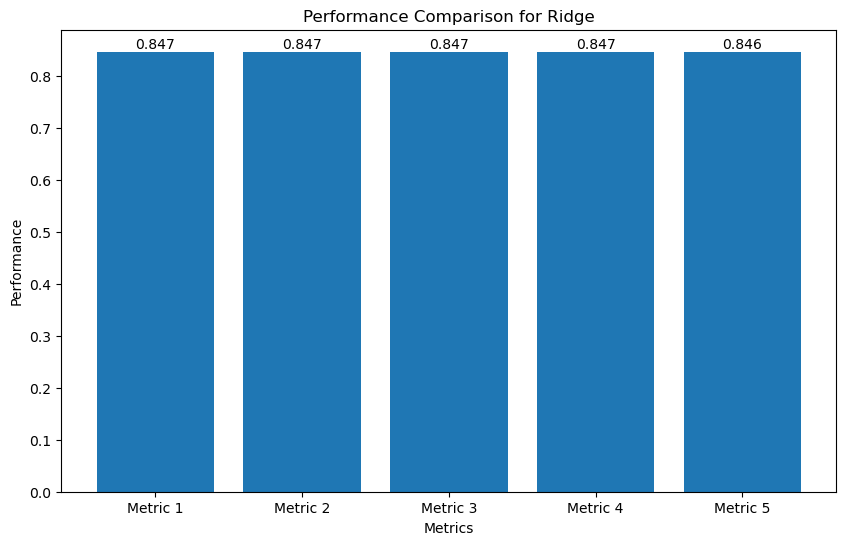

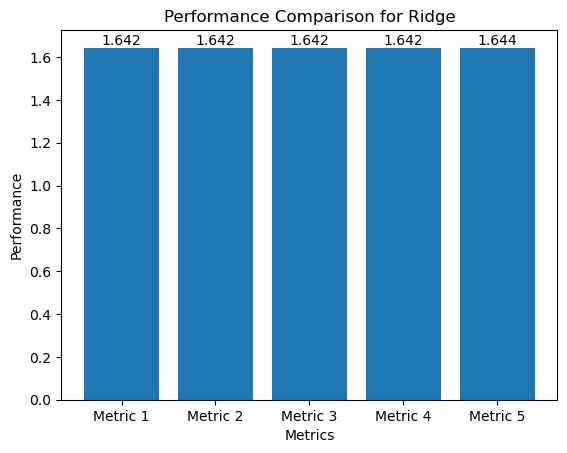

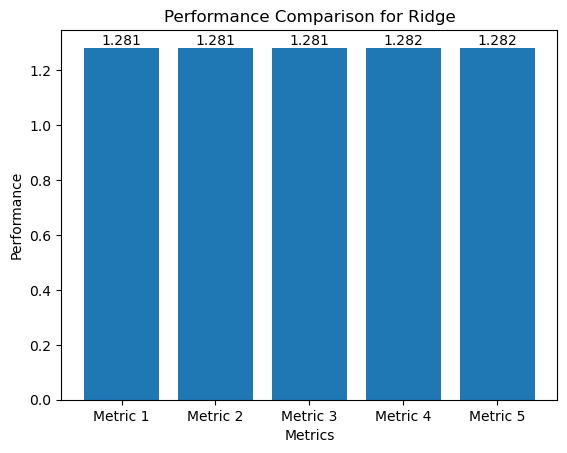

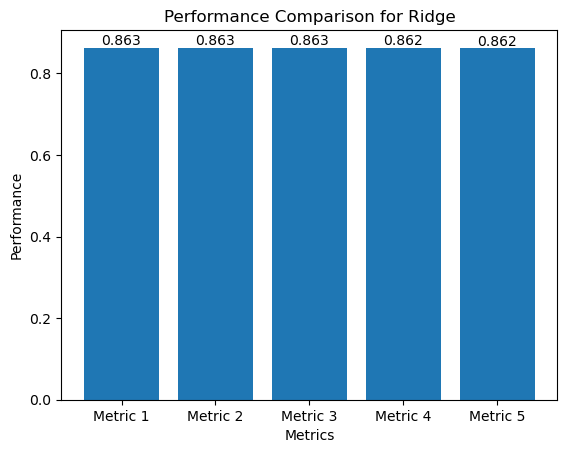

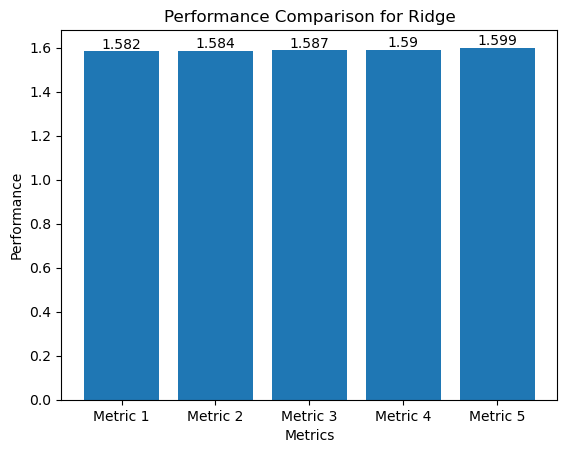

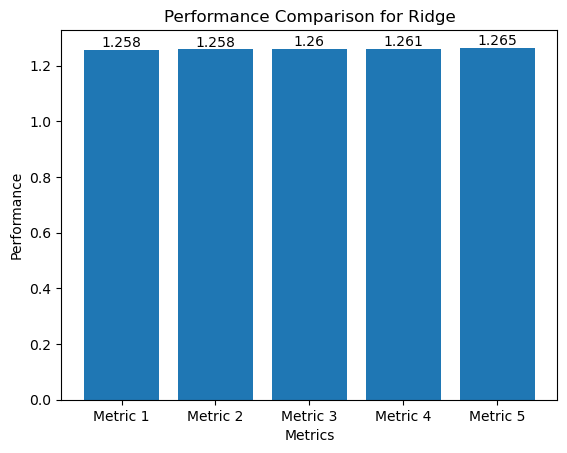

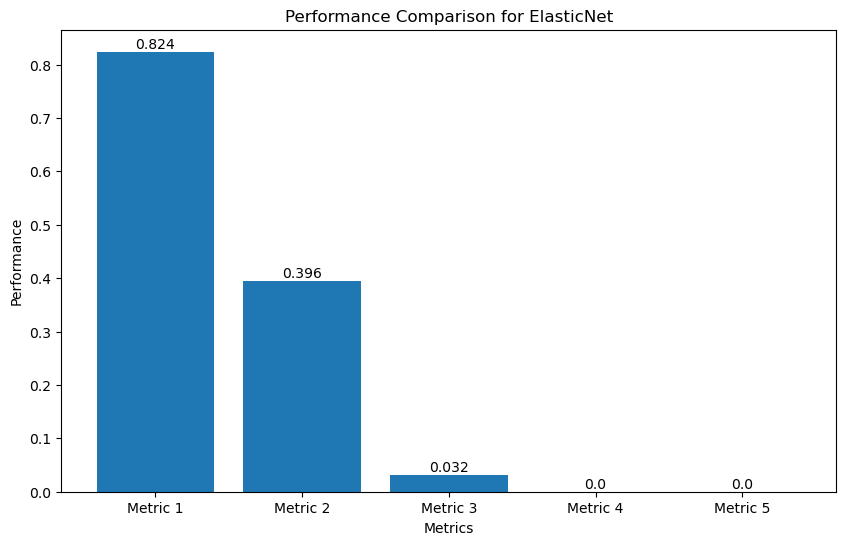

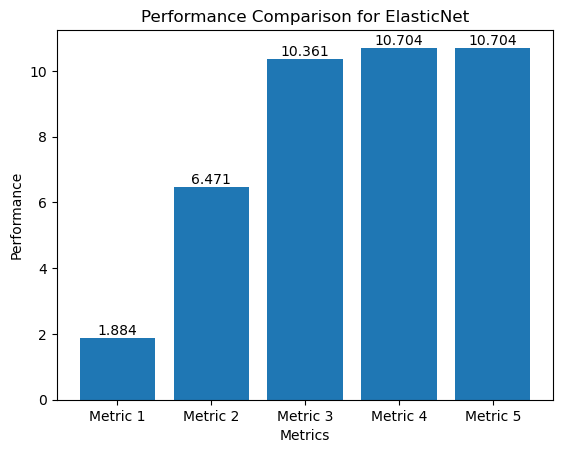

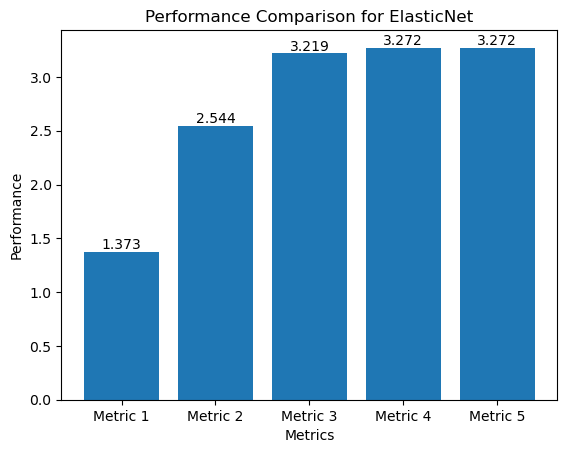

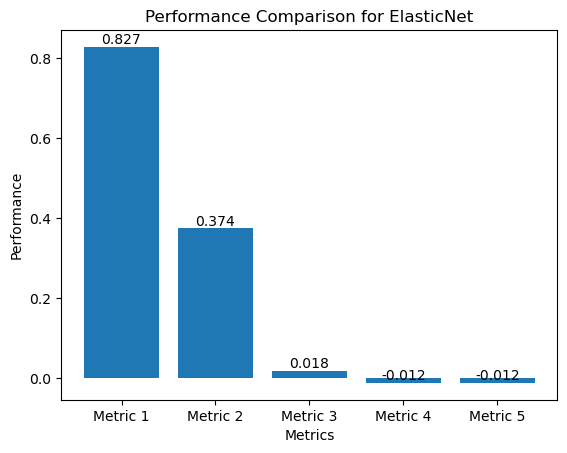

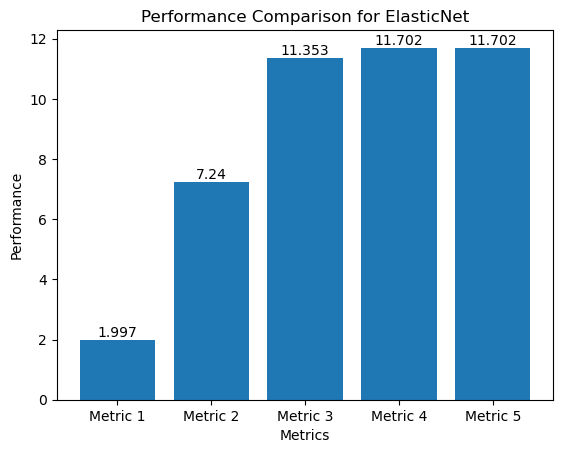

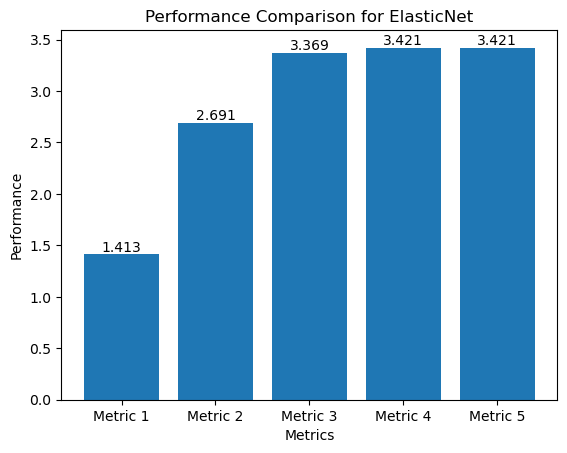

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Alpha', 'Train R-squared', 'Train MSE', 'Train RMSE', 'Test R-squared', 'Test MSE', 'Test RMSE'])

# Define the metrics columns
metrics_columns = ['Train R-squared', 'Train MSE', 'Train RMSE', 'Test R-squared', 'Test MSE', 'Test RMSE']

# Iterate over each model
for model in results_df['Model'].unique():
    # Filter the results for the current model
    model_results = results_df[results_df['Model'] == model]

    # Create a bar plot for each metric
    plt.figure(figsize=(10, 6))
    for metric in metrics_columns:
        metric_values = model_results[metric].values

        # Set the x positions for the bars
        x = range(len(metric_values))

        # Plot the metrics for the current model
        plt.bar(x, metric_values, align='center')

        # Add labels for each metric
        for i, v in enumerate(metric_values):
            plt.text(i, v, str(round(v, 3)), ha='center', va='bottom')

        # Add labels for each x position
        plt.xticks(x, ['Metric ' + str(i + 1) for i in x])

        # Add labels and title to the plot
        plt.xlabel('Metrics')
        plt.ylabel('Performance')
        plt.title(f'Performance Comparison for {model}')

        # Show the plot
        plt.show()


## Interpretation and Conclusions (10 points)

From our analysis, we have demonstrated that Chetty et al.'s data can be effectively utilized and extended using machine learning (ML) models. Our analysis indicates that Random Forest, XGBoost, and SVM are the most accurate prediction models for this purpose. By leveraging this data and our procedures, we can provide insights into pertinent economic questions, such as the relationship between income and life expectancy, and how other variables, such as gender, influences this relationship.

Our data analysis provides several guidance and insight for decision makers. The results suggest that decision makers should prioritize initiatives that promote healthy behaviors, as our analysis suggests that these behaviors have a significant impact on life expectancy. Investing in programs that encourage regular exercise, improve healthcare quality, enhance local area’s positive characteristics and minimize environmental problems. Moreover, our analysis highlights the importance of social insurance programs in promoting longevity. Decision makers should reassess and strengthen existing social safety nets, such as social security and healthcare coverage, to provide adequate support to vulnerable populations and reduce disparities in life expectancy. Income inequality also has a significant impact on life expectancy. Decision makers should prioritize measures to reduce income disparities and promote economic opportunities for all individuals. Implementing these suggestions have high potential on creating better quality of life and, in effect, increase life expectancies.  

While our analysis provides valuable insights, there are several limitations to reflect upon. First, it is important to remember that correlation does not imply causation. Although we have controlled for various factors, there may still be unmeasured variables influencing the observed relationships. Furthermore, income alone may not capture the full socioeconomic status of individuals, as it fails to consider other aspects of wealth and economic stability. Additionally, the income data used in our analysis are derived from tax records, which might not accurately reflect individuals' true income levels. Another flaw is the potential genetic predisposition to chronic illnesses in different genders. Our findings may be influenced by gender-related health disparities, where certain illnesses may affect males differently than females, leading to variations in life expectancy. Further research and observational studies are necessary to investigate this aspect more comprehensively. To enhance the robustness of our research, we suggest incorporating Quality-Adjusted Life Years (QALY) to calculate life expectancy. This measure accounts for various factors that affect the quality of life and health interventions, enabling a more comprehensive and nuanced understanding of the relationship between income and life expectancy.

In conclusion, our work extends the usefulness of Chetty et al.'s data using ML models and sheds light on the relationship between income and life expectancy, considering the impact of location. Decision makers can utilize our findings to allocate resources more effectively, implement targeted interventions, and address disparities in life expectancy. All in all, while the results provide insights,  it is also crucial to acknowledge the limitations of our analysis and consider additional factors that may influence the observed relationships.

## Reproducibility (Optional, 2 points)

Describe the ways you used to keep reproducibility briefly and include your colab or github link.

We are anticipating that the easiest way to share will be via Google Colab. You are welcome to work on Datahub, Github, or any way you like.